In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [6]:
data=pd.read_csv("C:/Users/SHRUTI/OneDrive/Desktop/MARS/data.csv")

In [7]:
data.shape

(14993, 24)

In [8]:
data.head()

,PetID,RescuerID,Type,Name,Age,BreedName1,BreedName2,Gender,ColorName1,ColorName2,...,Dewormed,Sterilized,Health,Quantity,Fee,StateName,VideoAmt,PhotoAmt,Description,AdoptionSpeed
0,86e1089a3,8480853f516546f6cf33aa88cd76c379,Cat,Nibble,3,Tabby,NaN,Male,Black,White,...,2,2,1,1,100,Selangor,0,1,Nibble is a 3+ month old ball of cuteness. He ...,2
1,6296e909a,3082c7125d8fb66f7dd4bff4192c8b14,Cat,No Name Yet,1,Domestic Medium Hair,NaN,Male,Black,Brown,...,3,3,1,1,0,Kuala Lumpur,0,2,I just found it alone yesterday near my apartm...,0
2,3422e4906,fa90fa5b1ee11c86938398b60abc32cb,Dog,Brisco,1,Mixed Breed,NaN,Male,Brown,White,...,1,2,1,1,0,Selangor,0,7,Their pregnant mother was dumped by her irresp...,3
3,5842f1ff5,9238e4f44c71a75282e62f7136c6b240,Dog,Miko,4,Mixed Breed,NaN,Female,Black,Brown,...,1,2,1,1,150,Kuala Lumpur,0,8,"Good guard dog, very alert, active, obedience ...",2
4,850a43f90,95481e953f8aed9ec3d16fc4509537e8,Dog,Hunter,1,Mixed Breed,NaN,Male,Black,NaN,...,2,2,1,1,0,Selangor,0,3,This handsome yet cute boy is up for adoption....,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PetID          14993 non-null  object
 1   RescuerID      14993 non-null  object
 2   Type           14993 non-null  object
 3   Name           13736 non-null  object
 4   Age            14993 non-null  int64 
 5   BreedName1     14988 non-null  object
 6   BreedName2     4231 non-null   object
 7   Gender         14993 non-null  object
 8   ColorName1     14993 non-null  object
 9   ColorName2     10522 non-null  object
 10  ColorName3     4389 non-null   object
 11  MaturitySize   14993 non-null  int64 
 12  FurLength      14993 non-null  int64 
 13  Vaccinated     14993 non-null  int64 
 14  Dewormed       14993 non-null  int64 
 15  Sterilized     14993 non-null  int64 
 16  Health         14993 non-null  int64 
 17  Quantity       14993 non-null  int64 
 18  Fee            14993 non-n

In [10]:
data.describe()

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,0.056760,3.889215,2.516441
std,18.155790,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,0.346185,3.487810,1.177265
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,255.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


In [11]:
data.isna().sum()

PetID                0
RescuerID            0
Type                 0
Name              1257
Age                  0
BreedName1           5
BreedName2       10762
Gender               0
ColorName1           0
ColorName2        4471
ColorName3       10604
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
StateName            0
VideoAmt             0
PhotoAmt             0
Description         12
AdoptionSpeed        0
dtype: int64

In [12]:
df=data.copy()

In [13]:
df.drop(['PetID','RescuerID','Name','BreedName2','ColorName2','ColorName3', 'Description'], axis=1, inplace=True)

### Label Encoding

In [14]:
#label encoding for type
Type_le= LabelEncoder()
Type_labels=Type_le.fit_transform(df['Type'])
Type_mappings={index: label for index, label in enumerate (Type_le.classes_)}
Type_mappings

{0: 'Cat', 1: 'Dog'}

In [15]:
df["BreedName1"].replace({np.nan: "Null"}, inplace=True)

In [16]:
#label encoding for Breed Name
BreedName_le= LabelEncoder()
BreedName_labels=BreedName_le.fit_transform(df['BreedName1'])
BreedName_mappings={index: label for index, label in enumerate (BreedName_le.classes_)}
BreedName_mappings

{0: 'Abyssinian',
 1: 'Affenpinscher',
 2: 'Airedale Terrier',
 3: 'Akita',
 4: 'American Bulldog',
 5: 'American Curl',
 6: 'American Shorthair',
 7: 'American Staffordshire Terrier',
 8: 'American Water Spaniel',
 9: 'American Wirehair',
 10: 'Applehead Siamese',
 11: 'Australian Kelpie',
 12: 'Australian Shepherd',
 13: 'Australian Terrier',
 14: 'Balinese',
 15: 'Basenji',
 16: 'Basset Hound',
 17: 'Beagle',
 18: 'Bearded Collie',
 19: 'Bedlington Terrier',
 20: 'Belgian Shepherd Dog Sheepdog',
 21: 'Belgian Shepherd Laekenois',
 22: 'Belgian Shepherd Malinois',
 23: 'Bengal',
 24: 'Birman',
 25: 'Black Labrador Retriever',
 26: 'Black Mouth Cur',
 27: 'Bobtail',
 28: 'Bombay',
 29: 'Border Collie',
 30: 'Boston Terrier',
 31: 'Boxer',
 32: 'British Shorthair',
 33: 'Bull Terrier',
 34: 'Bullmastiff',
 35: 'Burmese',
 36: 'Burmilla',
 37: 'Calico',
 38: 'Cattle Dog',
 39: 'Cavalier King Charles Spaniel',
 40: 'Chartreux',
 41: 'Chausie',
 42: 'Chihuahua',
 43: 'Chinese Crested Dog'

In [17]:
#label encoding for gender
Gender_le= LabelEncoder()
Gender_labels=Gender_le.fit_transform(df['Gender'])
Gender_mappings={index: label for index, label in enumerate (Gender_le.classes_)}
Gender_mappings

{0: 'Female', 1: 'Male', 2: 'Mixed'}

In [18]:
#label encoding for color name
ColorName_le= LabelEncoder()
ColorName_labels=ColorName_le.fit_transform(df['ColorName1'])
ColorName_mappings={index: label for index, label in enumerate (ColorName_le.classes_)}
ColorName_mappings

{0: 'Black',
 1: 'Brown',
 2: 'Cream',
 3: 'Golden',
 4: 'Gray',
 5: 'White',
 6: 'Yellow'}

In [19]:
#label encoding for state name
StateName_le= LabelEncoder()
StateName_labels=StateName_le.fit_transform(df['StateName'])
StateName_mappings={index: label for index, label in enumerate (StateName_le.classes_)}
StateName_mappings


{0: 'Johor',
 1: 'Kedah',
 2: 'Kelantan',
 3: 'Kuala Lumpur',
 4: 'Labuan',
 5: 'Melaka',
 6: 'Negeri Sembilan',
 7: 'Pahang',
 8: 'Perak',
 9: 'Pulau Pinang',
 10: 'Sabah',
 11: 'Sarawak',
 12: 'Selangor',
 13: 'Terengganu'}

In [21]:
#replace with label encoded labels
df['Type']=Type_labels
df['BreedName1']=BreedName_labels
df['Gender']=Gender_labels
df['ColorName1']=ColorName_labels
df['StateName']=StateName_labels

In [22]:
df.astype(float)

,Type,Age,BreedName1,Gender,ColorName1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,StateName,VideoAmt,PhotoAmt,AdoptionSpeed
0,0.0,3.0,157.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,100.0,12.0,0.0,1.0,2.0
1,0.0,1.0,57.0,1.0,0.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0
2,1.0,1.0,104.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,12.0,0.0,7.0,3.0
3,1.0,4.0,104.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,150.0,3.0,0.0,8.0,2.0
4,1.0,1.0,104.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,12.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0.0,2.0,58.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,0.0,12.0,0.0,3.0,2.0
14989,0.0,60.0,57.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,12.0,0.0,3.0,4.0
14990,0.0,2.0,57.0,2.0,2.0,3.0,2.0,2.0,1.0,3.0,1.0,5.0,30.0,12.0,0.0,5.0,3.0
14991,0.0,9.0,58.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,4.0


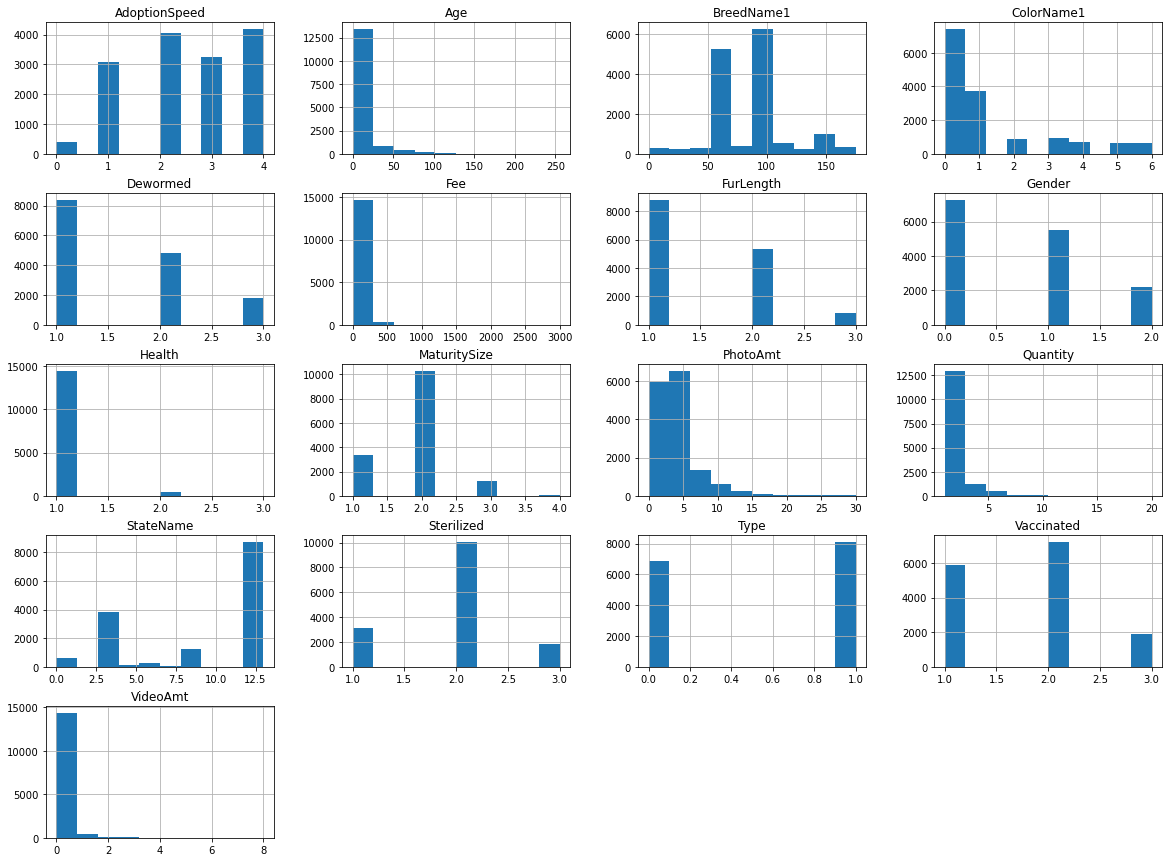

In [23]:
#histogram plot for all variables
df.hist(figsize=(20,15))
plt.savefig('All variables histogram.png')
#plt.show()

In [65]:
#finding correlation of other variables with adoption speed
cor_features=df.corr()
a=cor_features[['AdoptionSpeed']]
a

,AdoptionSpeed
Type,0.091240
Age,0.100510
BreedName1,0.026832
Gender,-0.018684
ColorName1,-0.029600
MaturitySize,0.045653
FurLength,-0.091337
Vaccinated,-0.059043
Dewormed,-0.013210
Sterilized,-0.083447


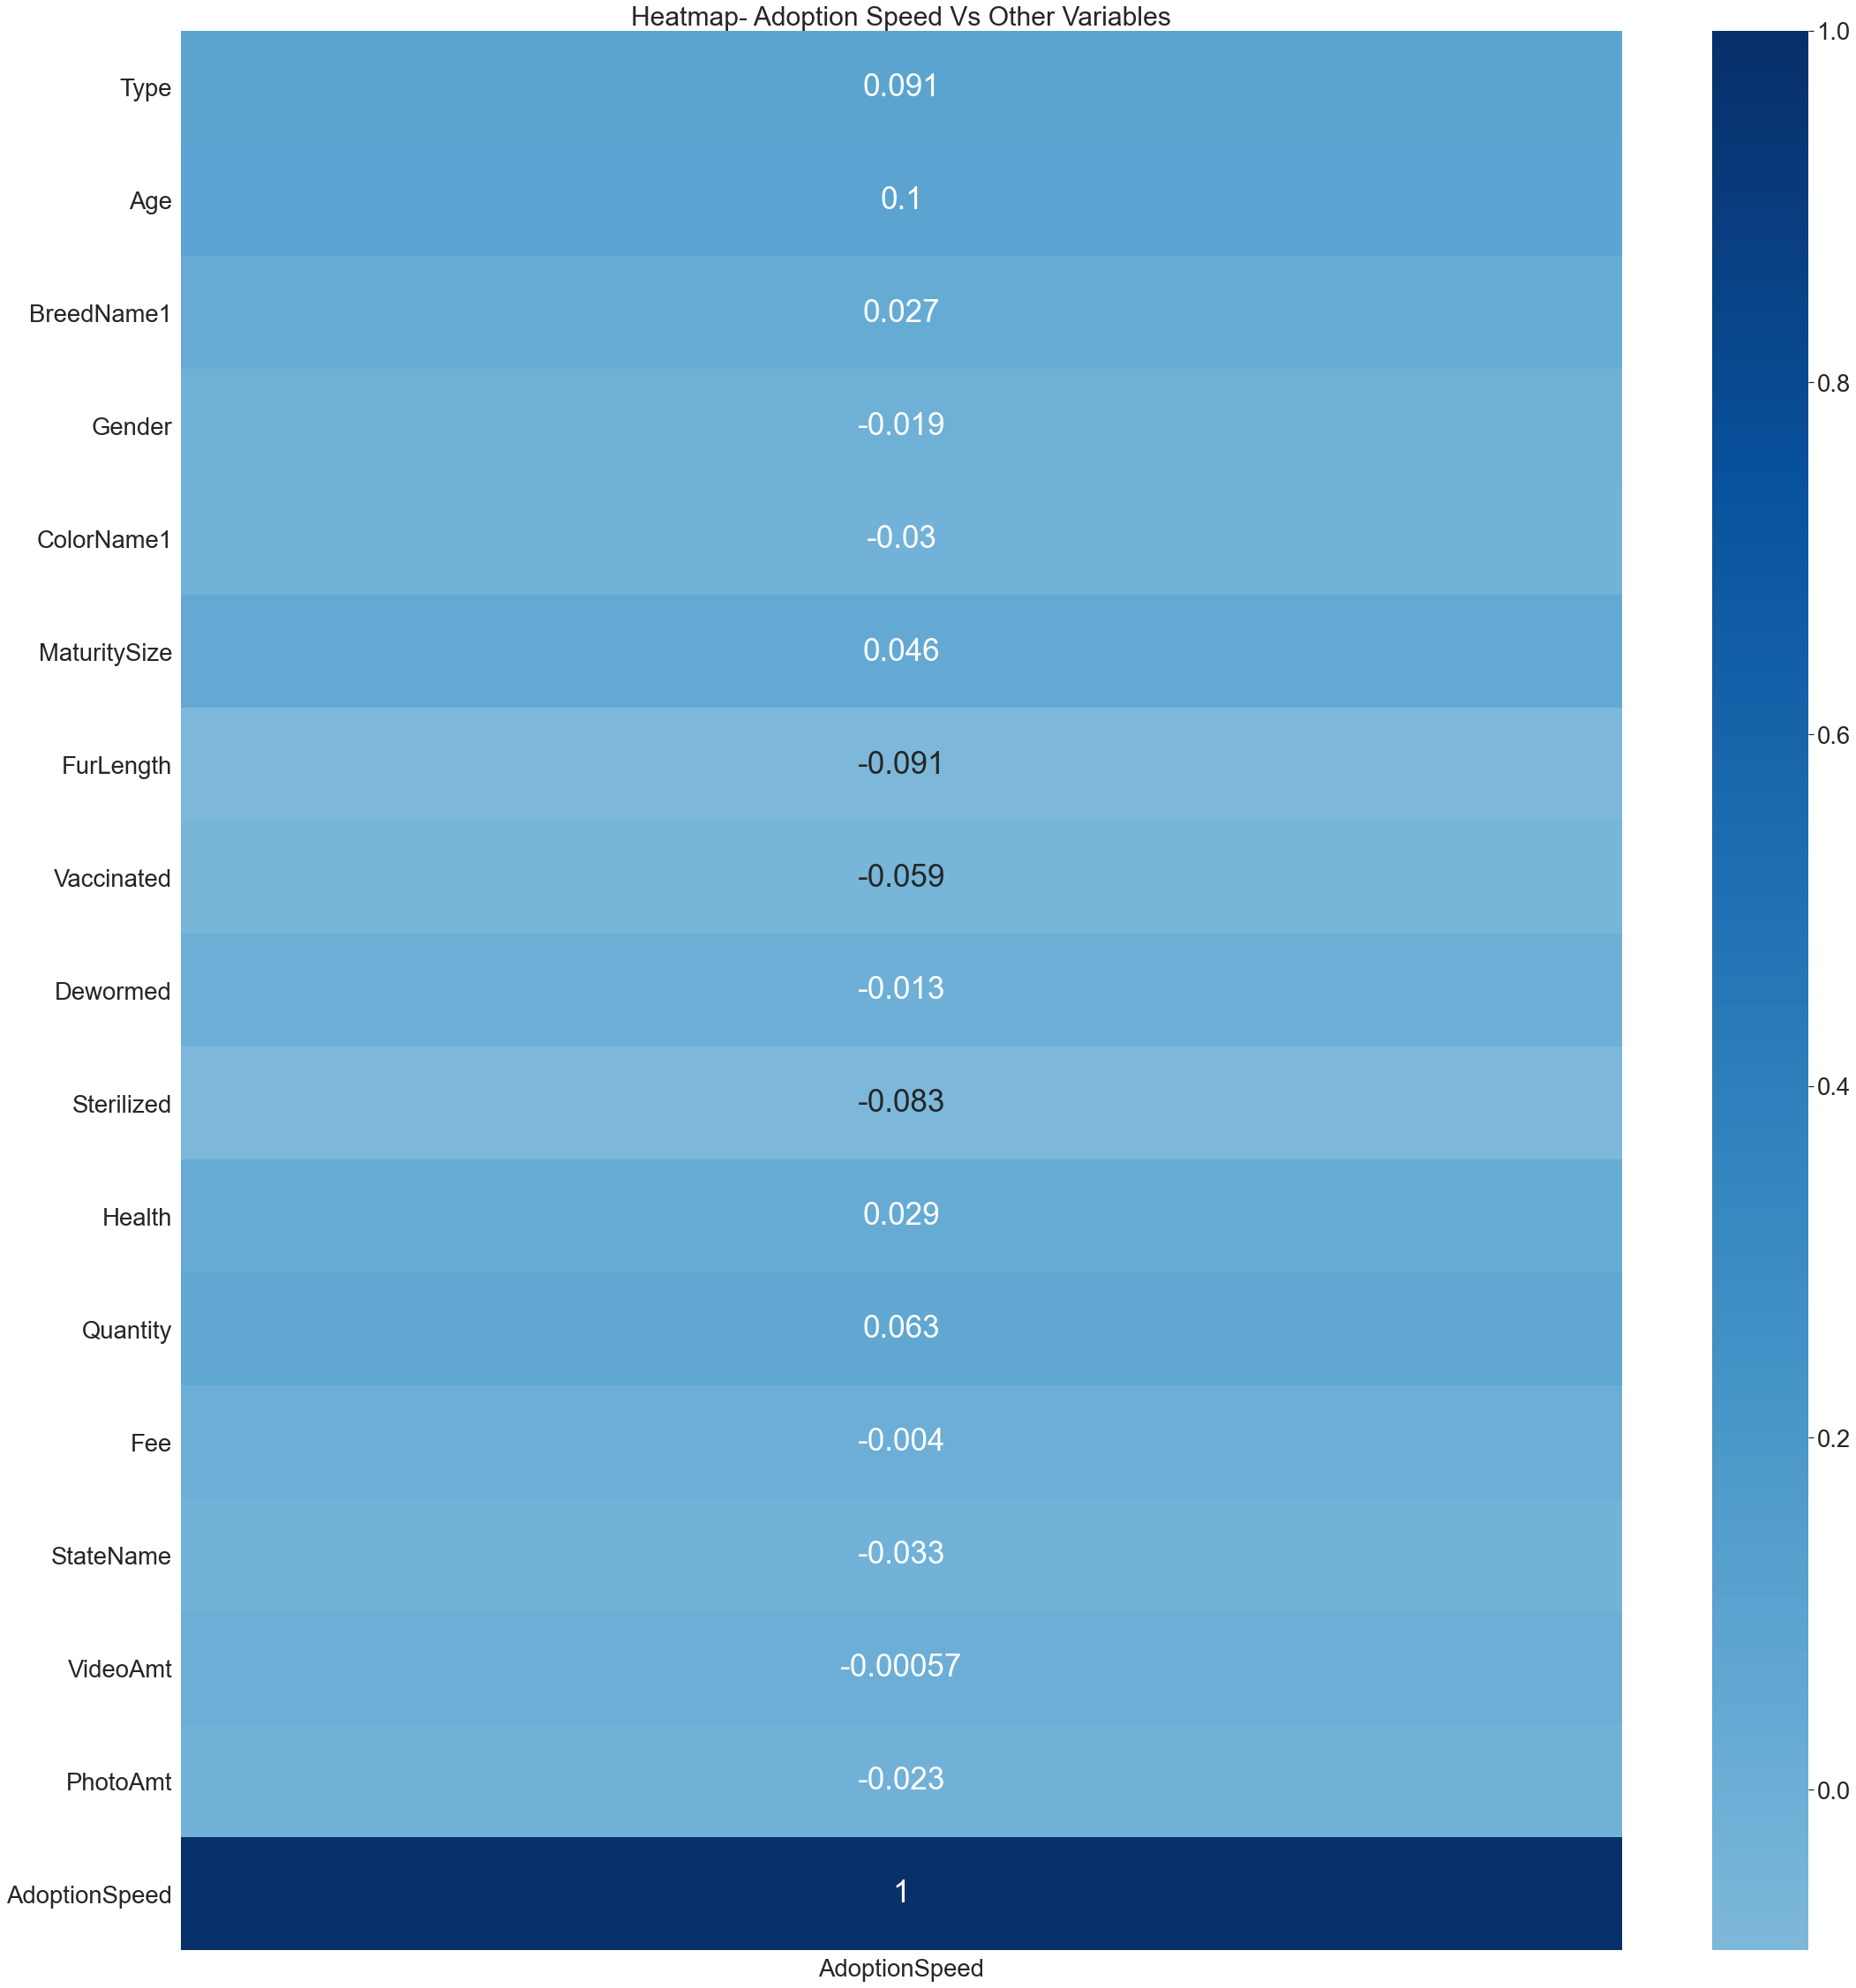

In [67]:
#drawing a heatmap
sns.set(font_scale=2.5)
plt.figure(figsize=(32,32))
sns.heatmap(a, annot=True, annot_kws={"fontsize":35}, cmap='Blues', center=0, )
plt.title('Heatmap- Adoption Speed Vs Other Variables', size=30)
plt.savefig('Heatmap- Adoption Speed Vs Other Variables.png')

### Correlation Adoption Speed vs other Varibles based on Type

In [68]:
X1= df.loc[(df['Type'] == 0)]
X1

,Type,Age,BreedName1,Gender,ColorName1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,StateName,VideoAmt,PhotoAmt,AdoptionSpeed
0,0,3,157,1,0,1,1,2,2,2,1,1,100,12,0,1,2
1,0,1,57,1,0,2,2,3,3,3,1,1,0,3,0,2,0
5,0,3,58,0,2,2,1,2,2,2,1,1,0,12,0,2,2
6,0,12,56,1,0,2,3,2,2,3,1,1,300,12,0,3,1
8,0,2,57,0,4,2,2,2,2,2,1,1,0,12,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,0,1,58,0,2,2,1,2,1,2,1,1,0,3,0,1,3
14988,0,2,58,2,0,2,2,2,2,2,1,4,0,12,0,3,2
14989,0,60,57,2,0,2,2,1,1,1,1,2,0,12,0,3,4
14990,0,2,57,2,2,3,2,2,1,3,1,5,30,12,0,5,3


In [76]:
#correlation adoption speed vs other variables
cat_cor_features=X1.corr()
map1=cat_cor_features[['AdoptionSpeed']]
map1

,AdoptionSpeed
Type,NaN
Age,0.143387
BreedName1,-0.048745
Gender,0.006602
ColorName1,-0.025956
MaturitySize,0.036030
FurLength,-0.076639
Vaccinated,-0.067206
Dewormed,-0.017553
Sterilized,-0.100239


Text(0.5, 1.0, 'Cat Heatmap: Adoption Speed Vs Other Variables')

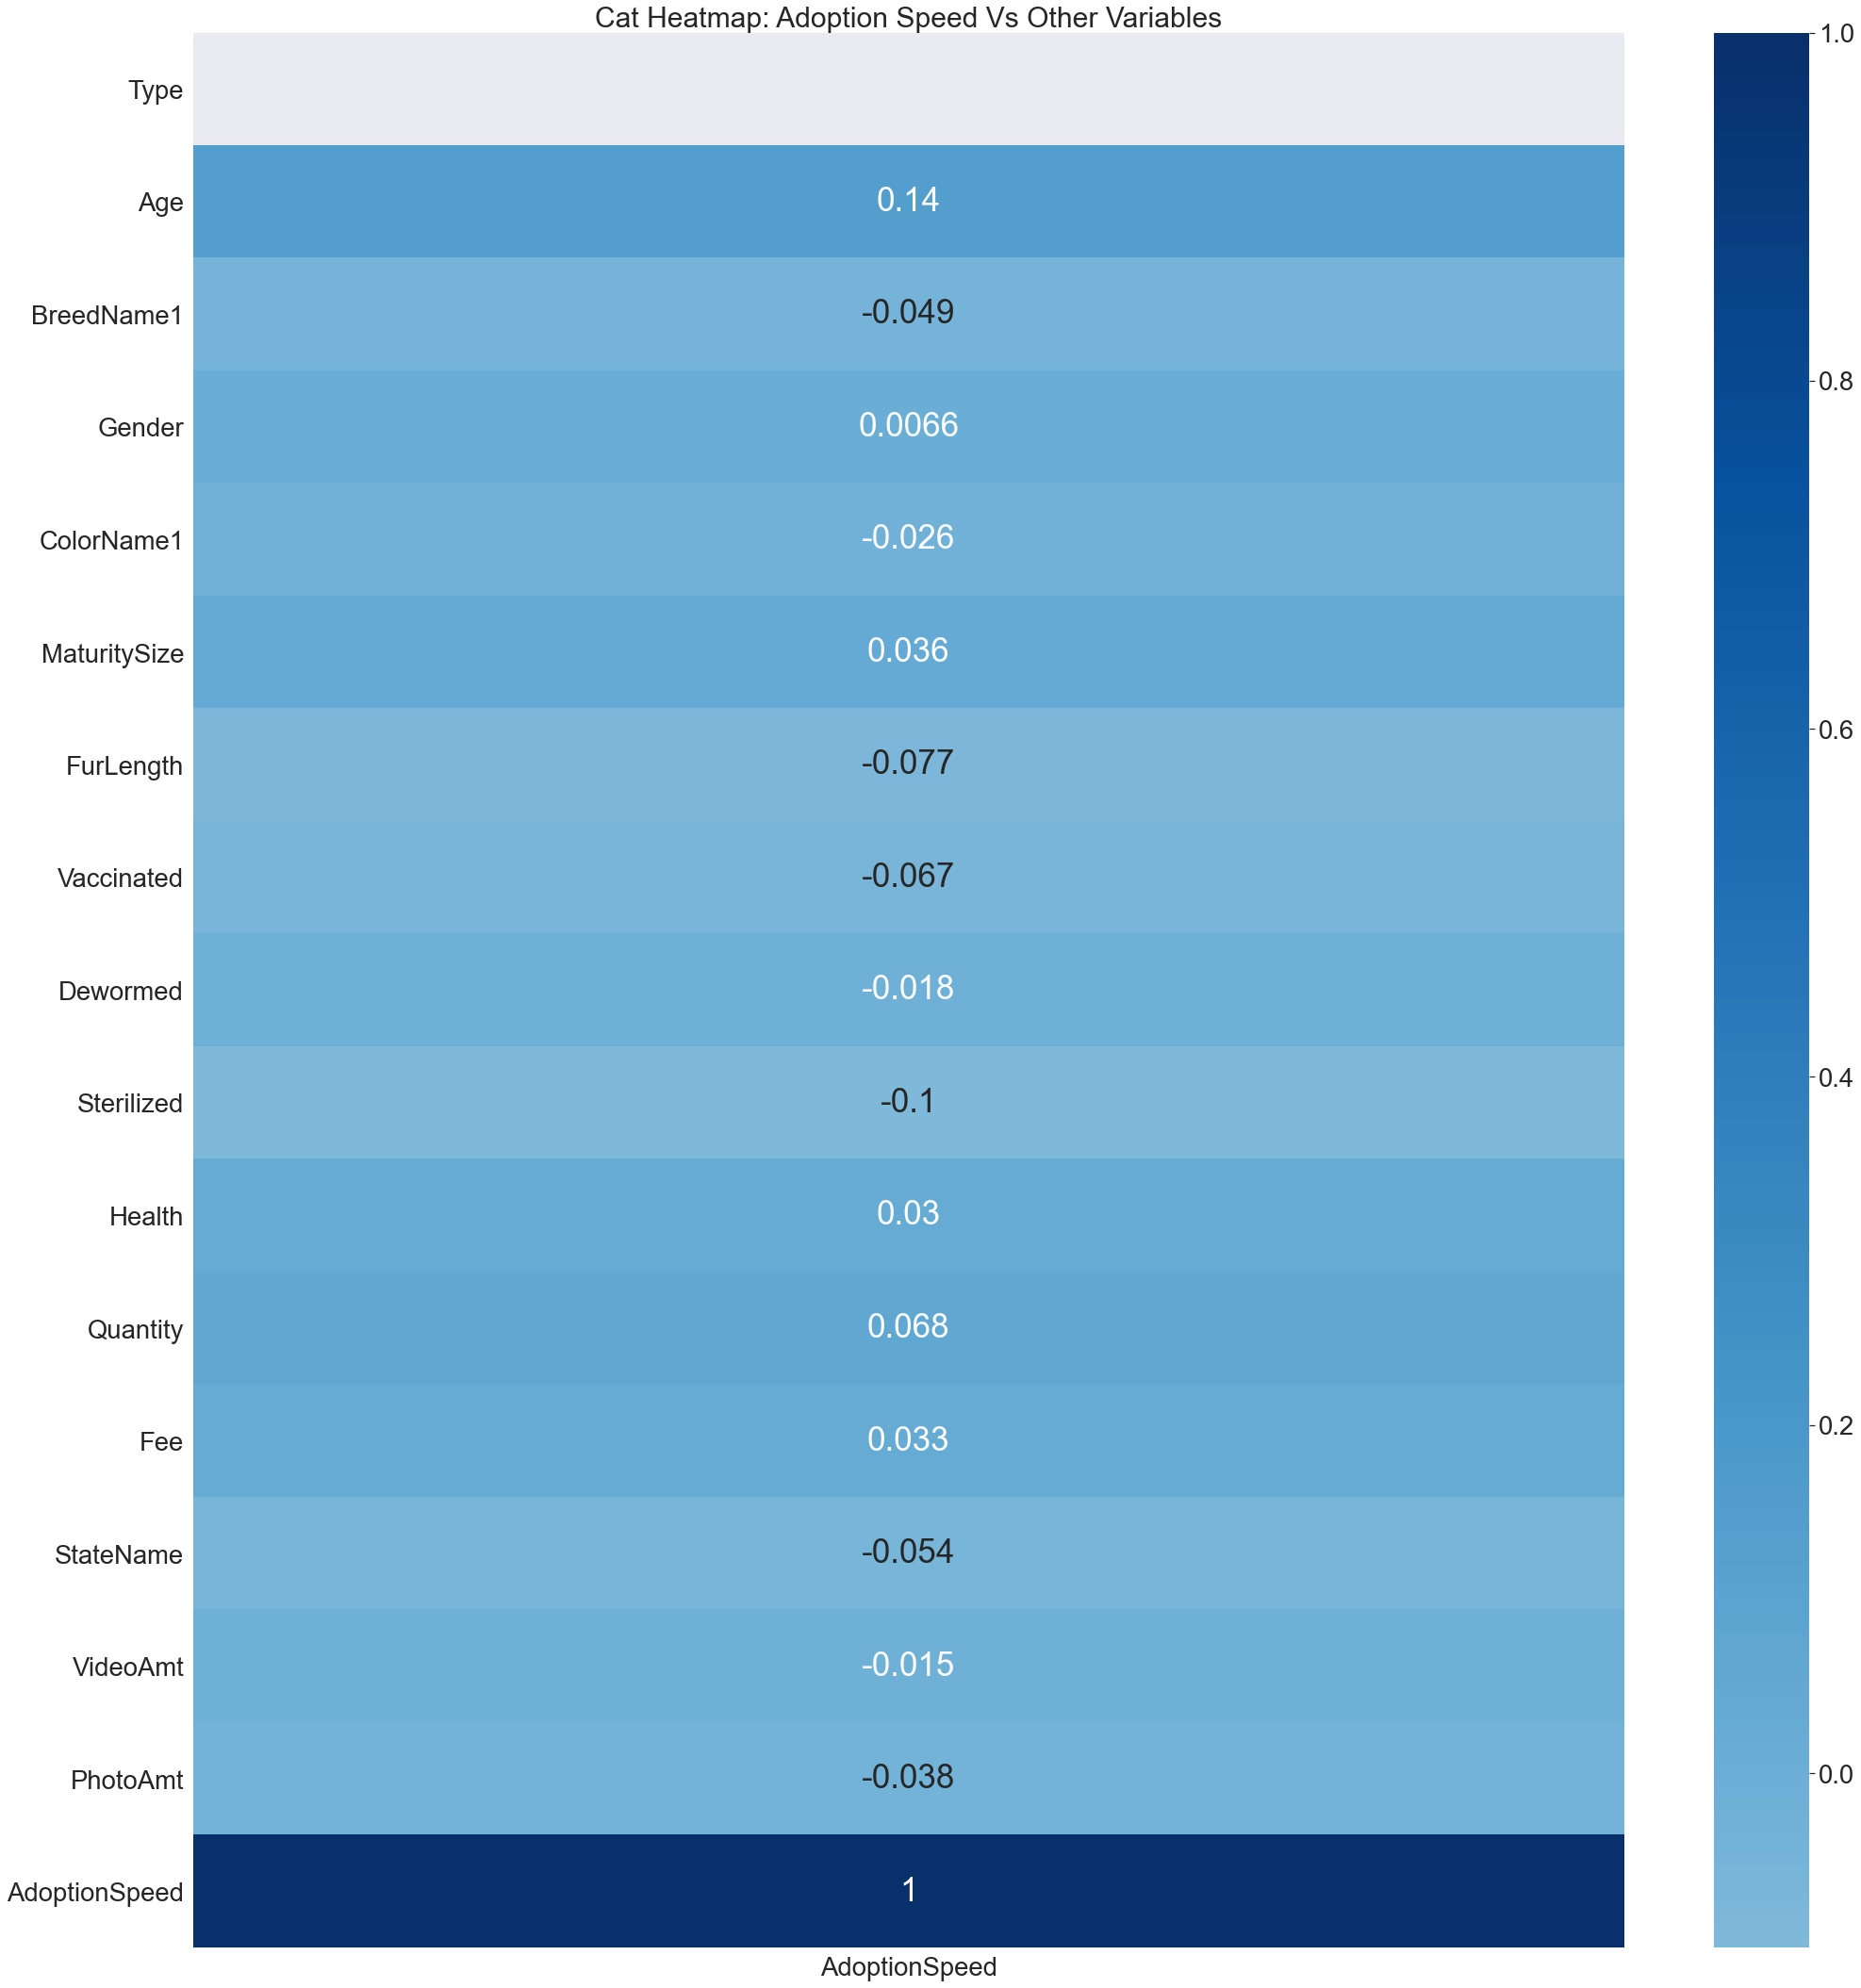

In [79]:
#plotting heatmap
sns.set(font_scale=2.5)
plt.figure(figsize=(30,30))
sns.heatmap(map1, annot=True, annot_kws={"fontsize":35}, cmap='Blues', center=0)
plt.title('Cat Heatmap: Adoption Speed Vs Other Variables')
#plt.savefig('CatHeatAdoptionVOther.png')

In [71]:
#data frame for type dog
X2= df.loc[(df['Type'] == 1)]

In [72]:
#correlation for adoption speed vs other variables
dog_cor_features=X2.corr()
map2=dog_cor_features[['AdoptionSpeed']]
map2


,AdoptionSpeed
Type,NaN
Age,0.064194
BreedName1,0.015618
Gender,-0.023158
ColorName1,-0.003815
MaturitySize,0.024993
FurLength,-0.105275
Vaccinated,-0.038337
Dewormed,-0.005764
Sterilized,-0.070336


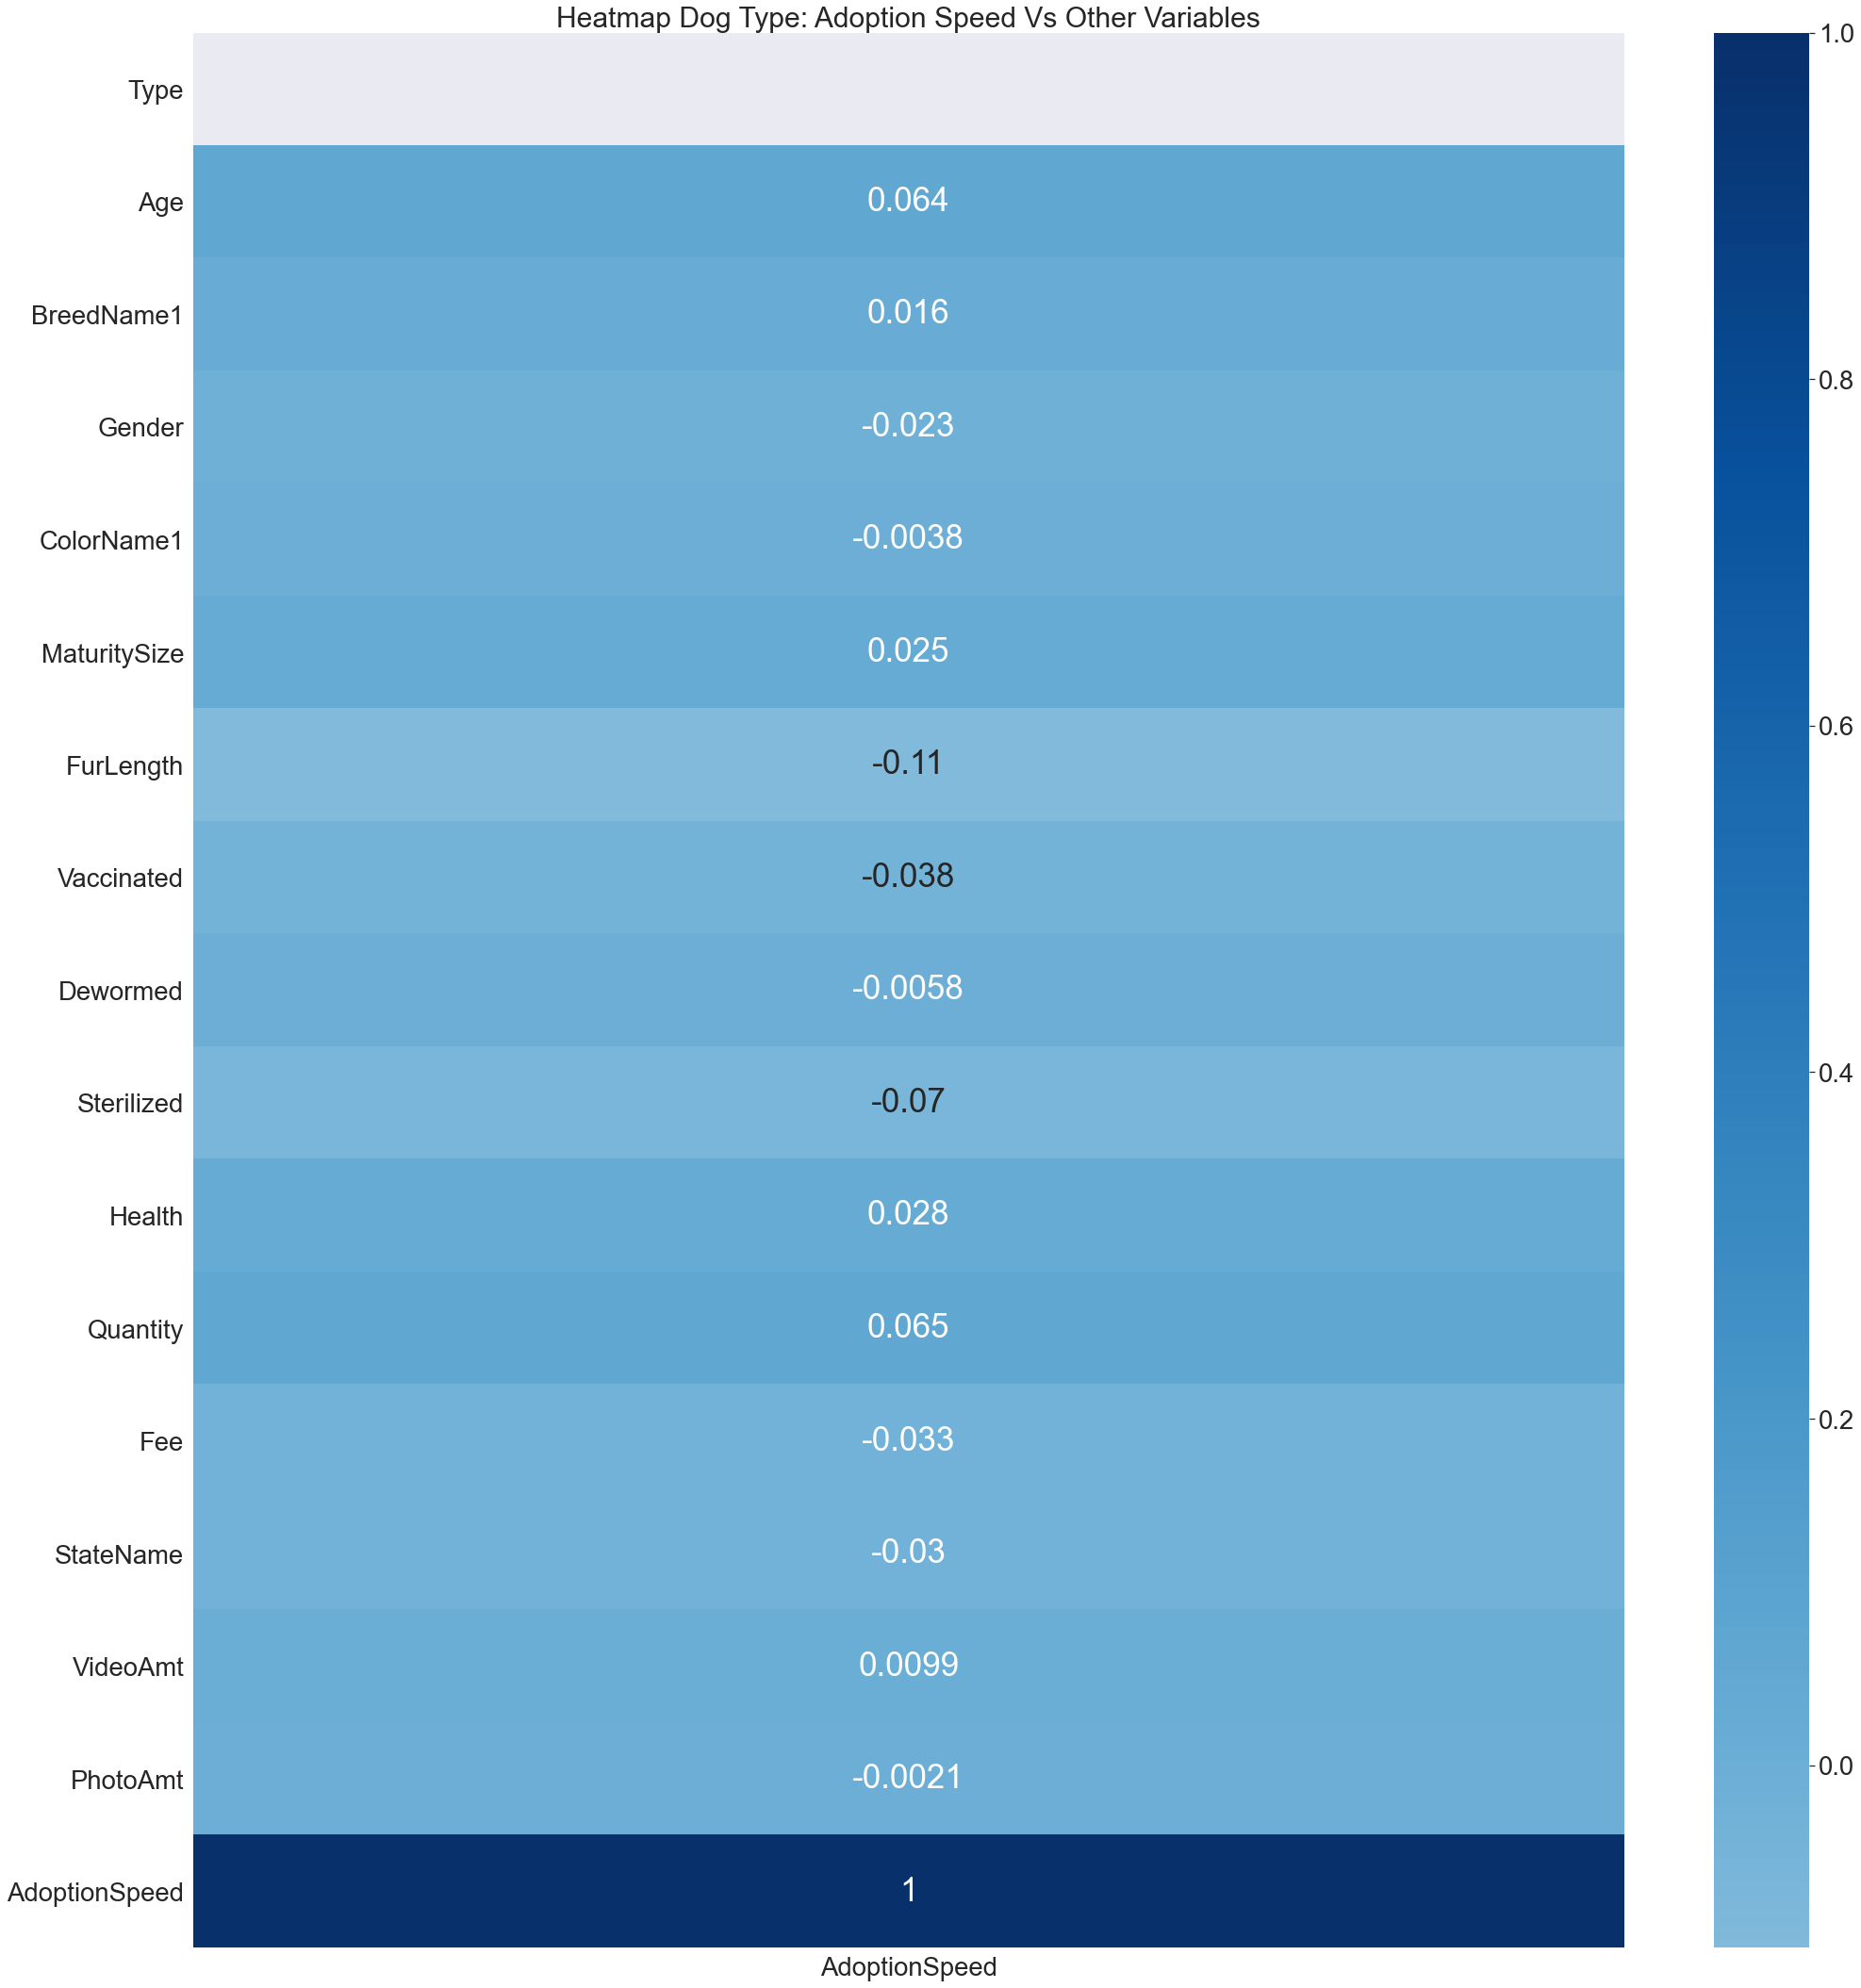

In [80]:
#plot heatmap
sns.set(font_scale=2.5)
plt.figure(figsize=(30,30))
sns.heatmap(map2, annot=True, annot_kws={"fontsize":35},cmap='Blues', center=0)
plt.title('Heatmap Dog Type: Adoption Speed Vs Other Variables')
plt.savefig('Heatmap Dog Type Adoption Speed Vs Other Variables.png')

### Adoption Speed EDA

In [11]:
data['AdoptionSpeed'].value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

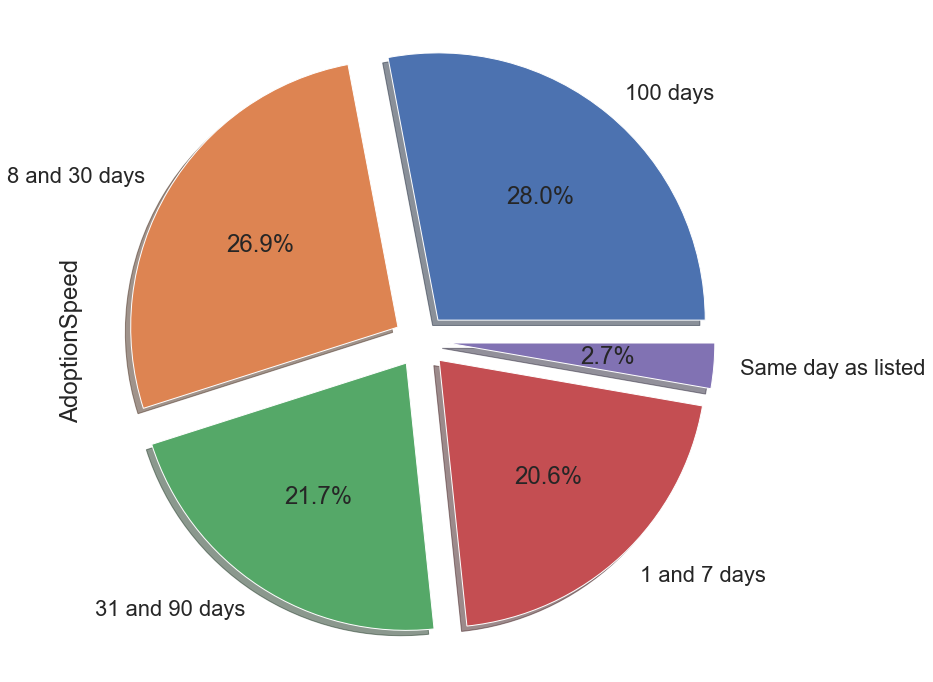

In [851]:
#Plot for distribution of the Adoption Speeds
labels = ['100 days', '8 and 30 days','31 and 90 days', '1 and 7 days', 'Same day as listed']
plt.figure(figsize=(15,10))
data['AdoptionSpeed'].value_counts().plot(kind='pie', labels=labels, shadow=True,explode=(0.1,0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.savefig('Adoption__Graph.png')

### Adoption Speed Based on Type

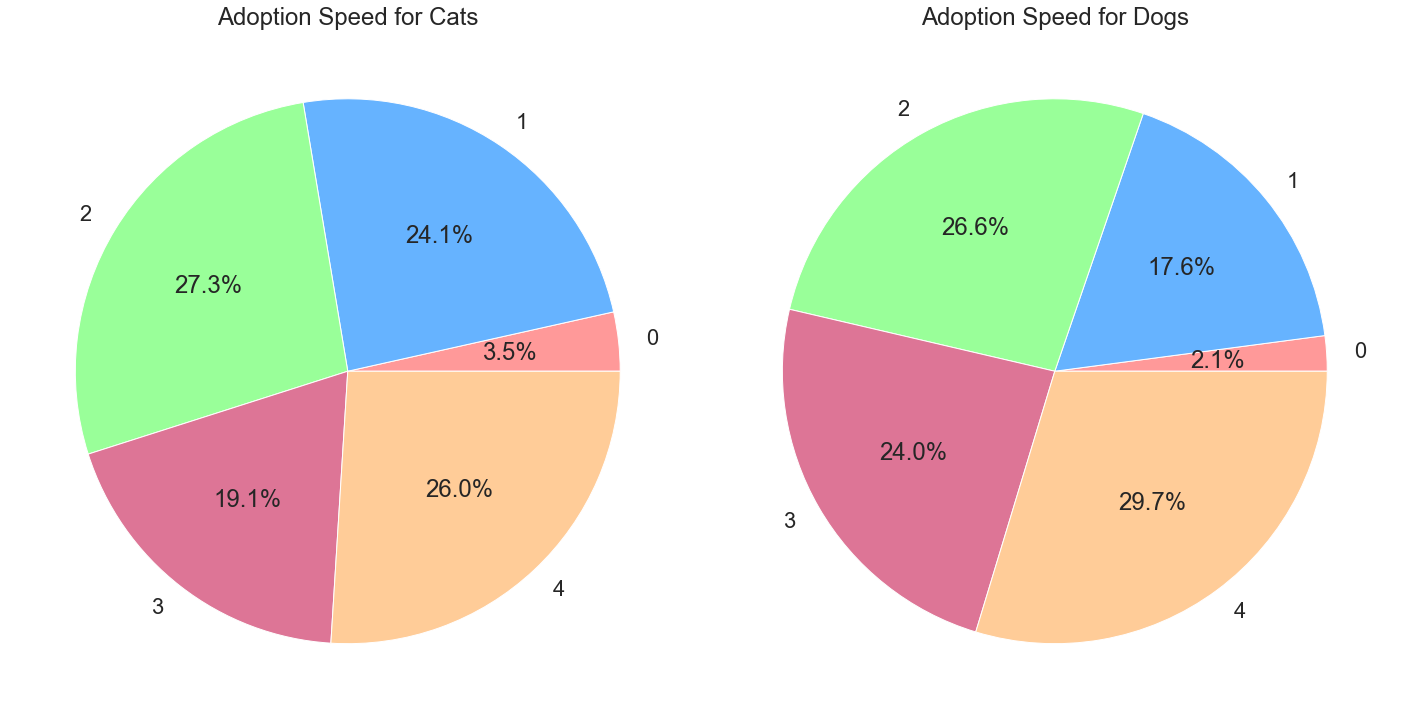

In [841]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,15))
lab=['0','1','2','3','4']
colors = ['#ff9999','#66b3ff','#99ff99','#DD7596', '#ffcc98']

ax1.pie(data[data["Type"] == 'Cat'].groupby(["AdoptionSpeed"]).size(), labels=lab, autopct='%1.1f%%', colors= colors)
ax1.set_title("Adoption Speed for Cats")

ax2.pie(data[data["Type"] == 'Dog'].groupby(["AdoptionSpeed"]).size(), labels=lab, autopct='%1.1f%%', colors= colors)
ax2.set_title("Adoption Speed for Dogs")

#plt.show()
plt.savefig('Adoption_Type_Graph.png')

### Adoption Speed based on Breed Name

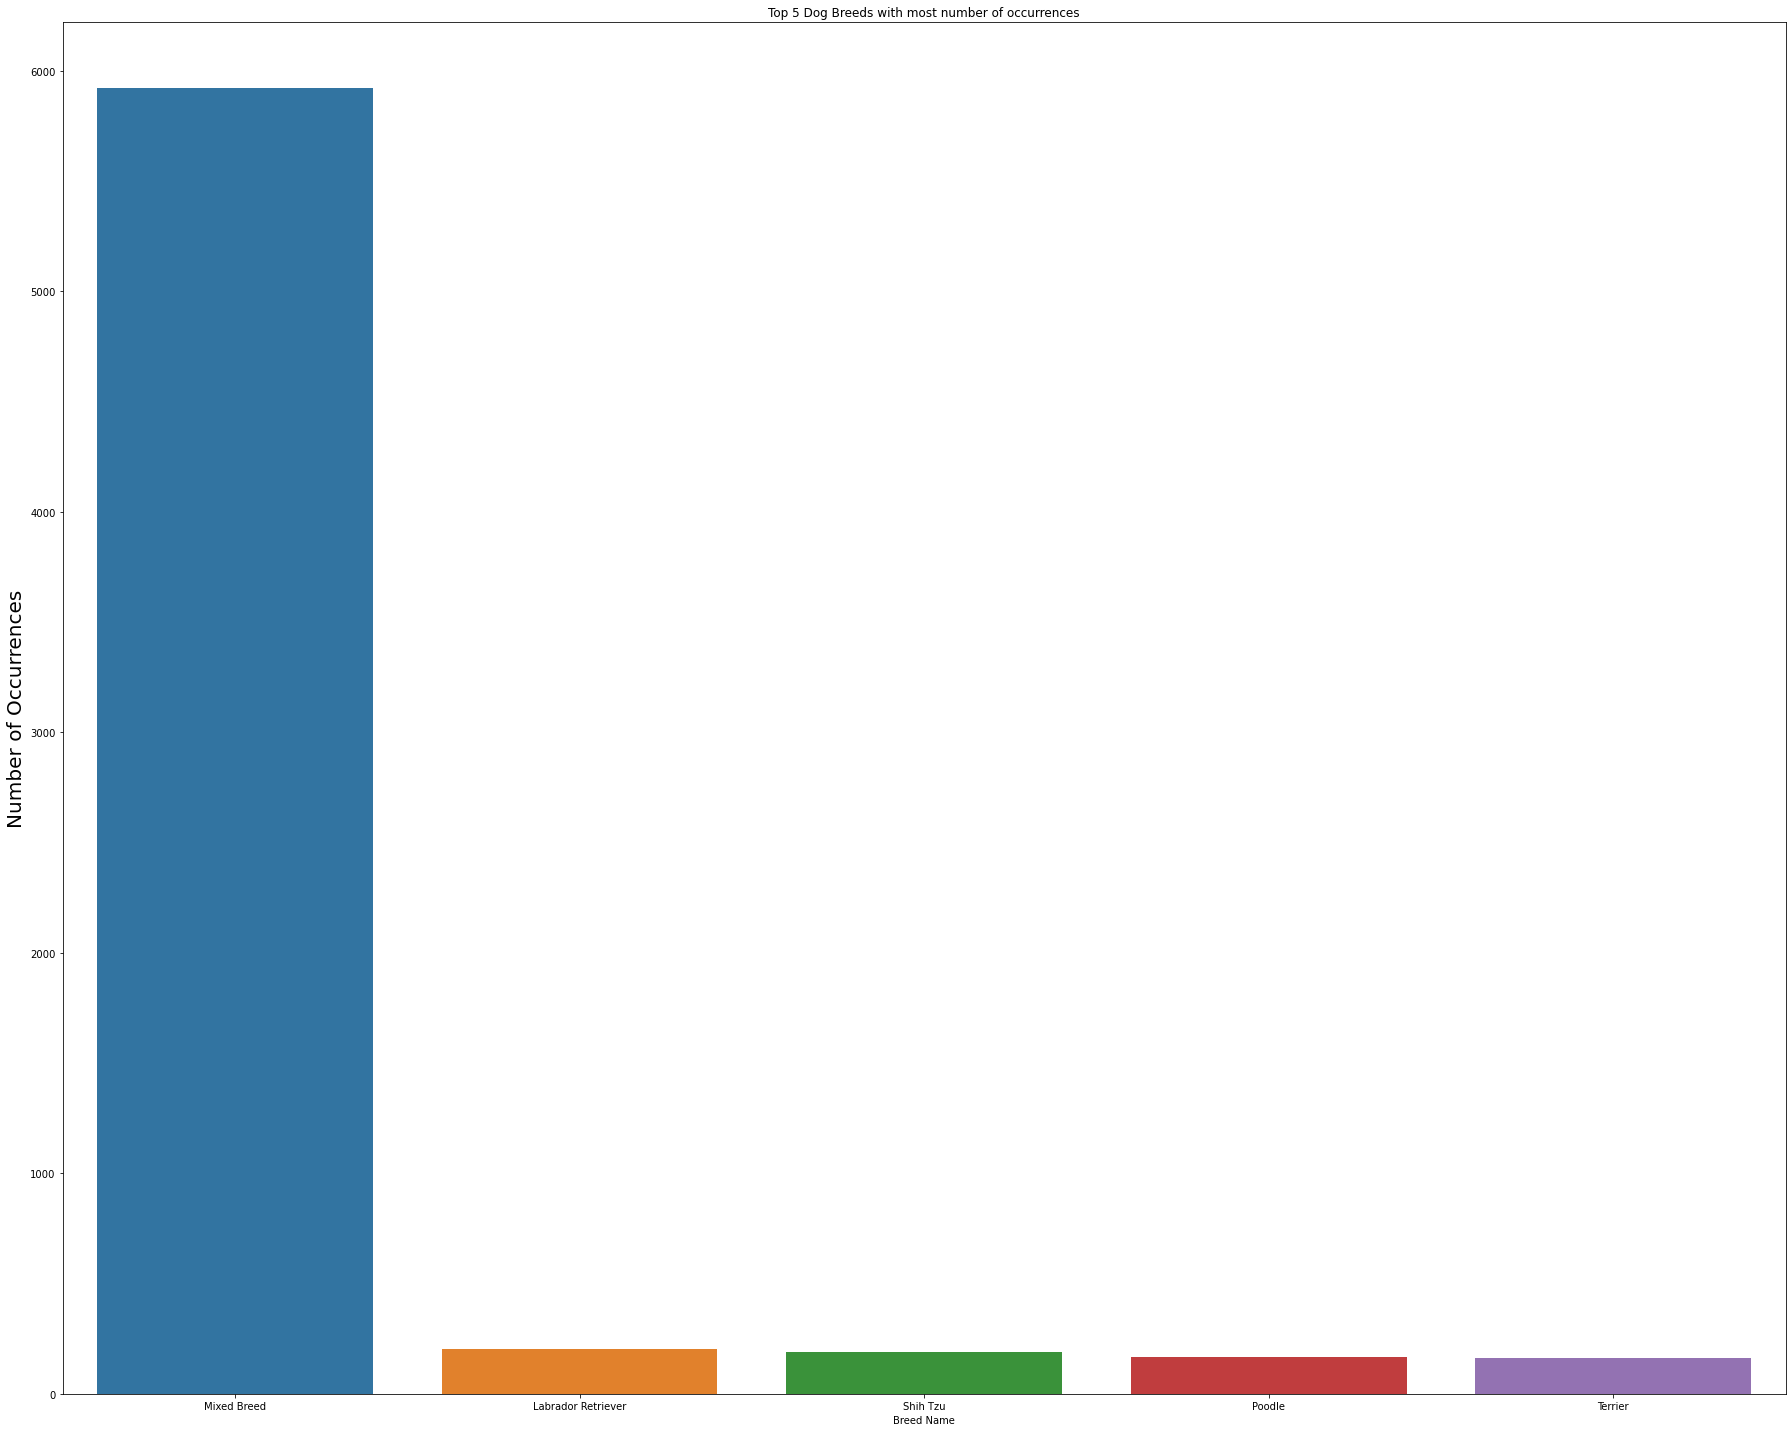

In [60]:
import warnings
warnings.filterwarnings("ignore")

#plot for top 5 dog breeds based on occurences
Dog_Breed=data.loc[data['Type'] == 'Dog', 'BreedName1']
y=Dog_Breed.value_counts()
y=y[:5]
plt.figure(figsize=(25,20))
sns.barplot(y.index,  y.values)
plt.title('Top 5 Dog Breeds with most number of occurrences')
plt.ylabel('Number of Occurrences', size=20)
plt.xlabel('Breed Name')
#plt.show()
plt.savefig('Top 5 Dog Breeds with most number of occurrences.png')

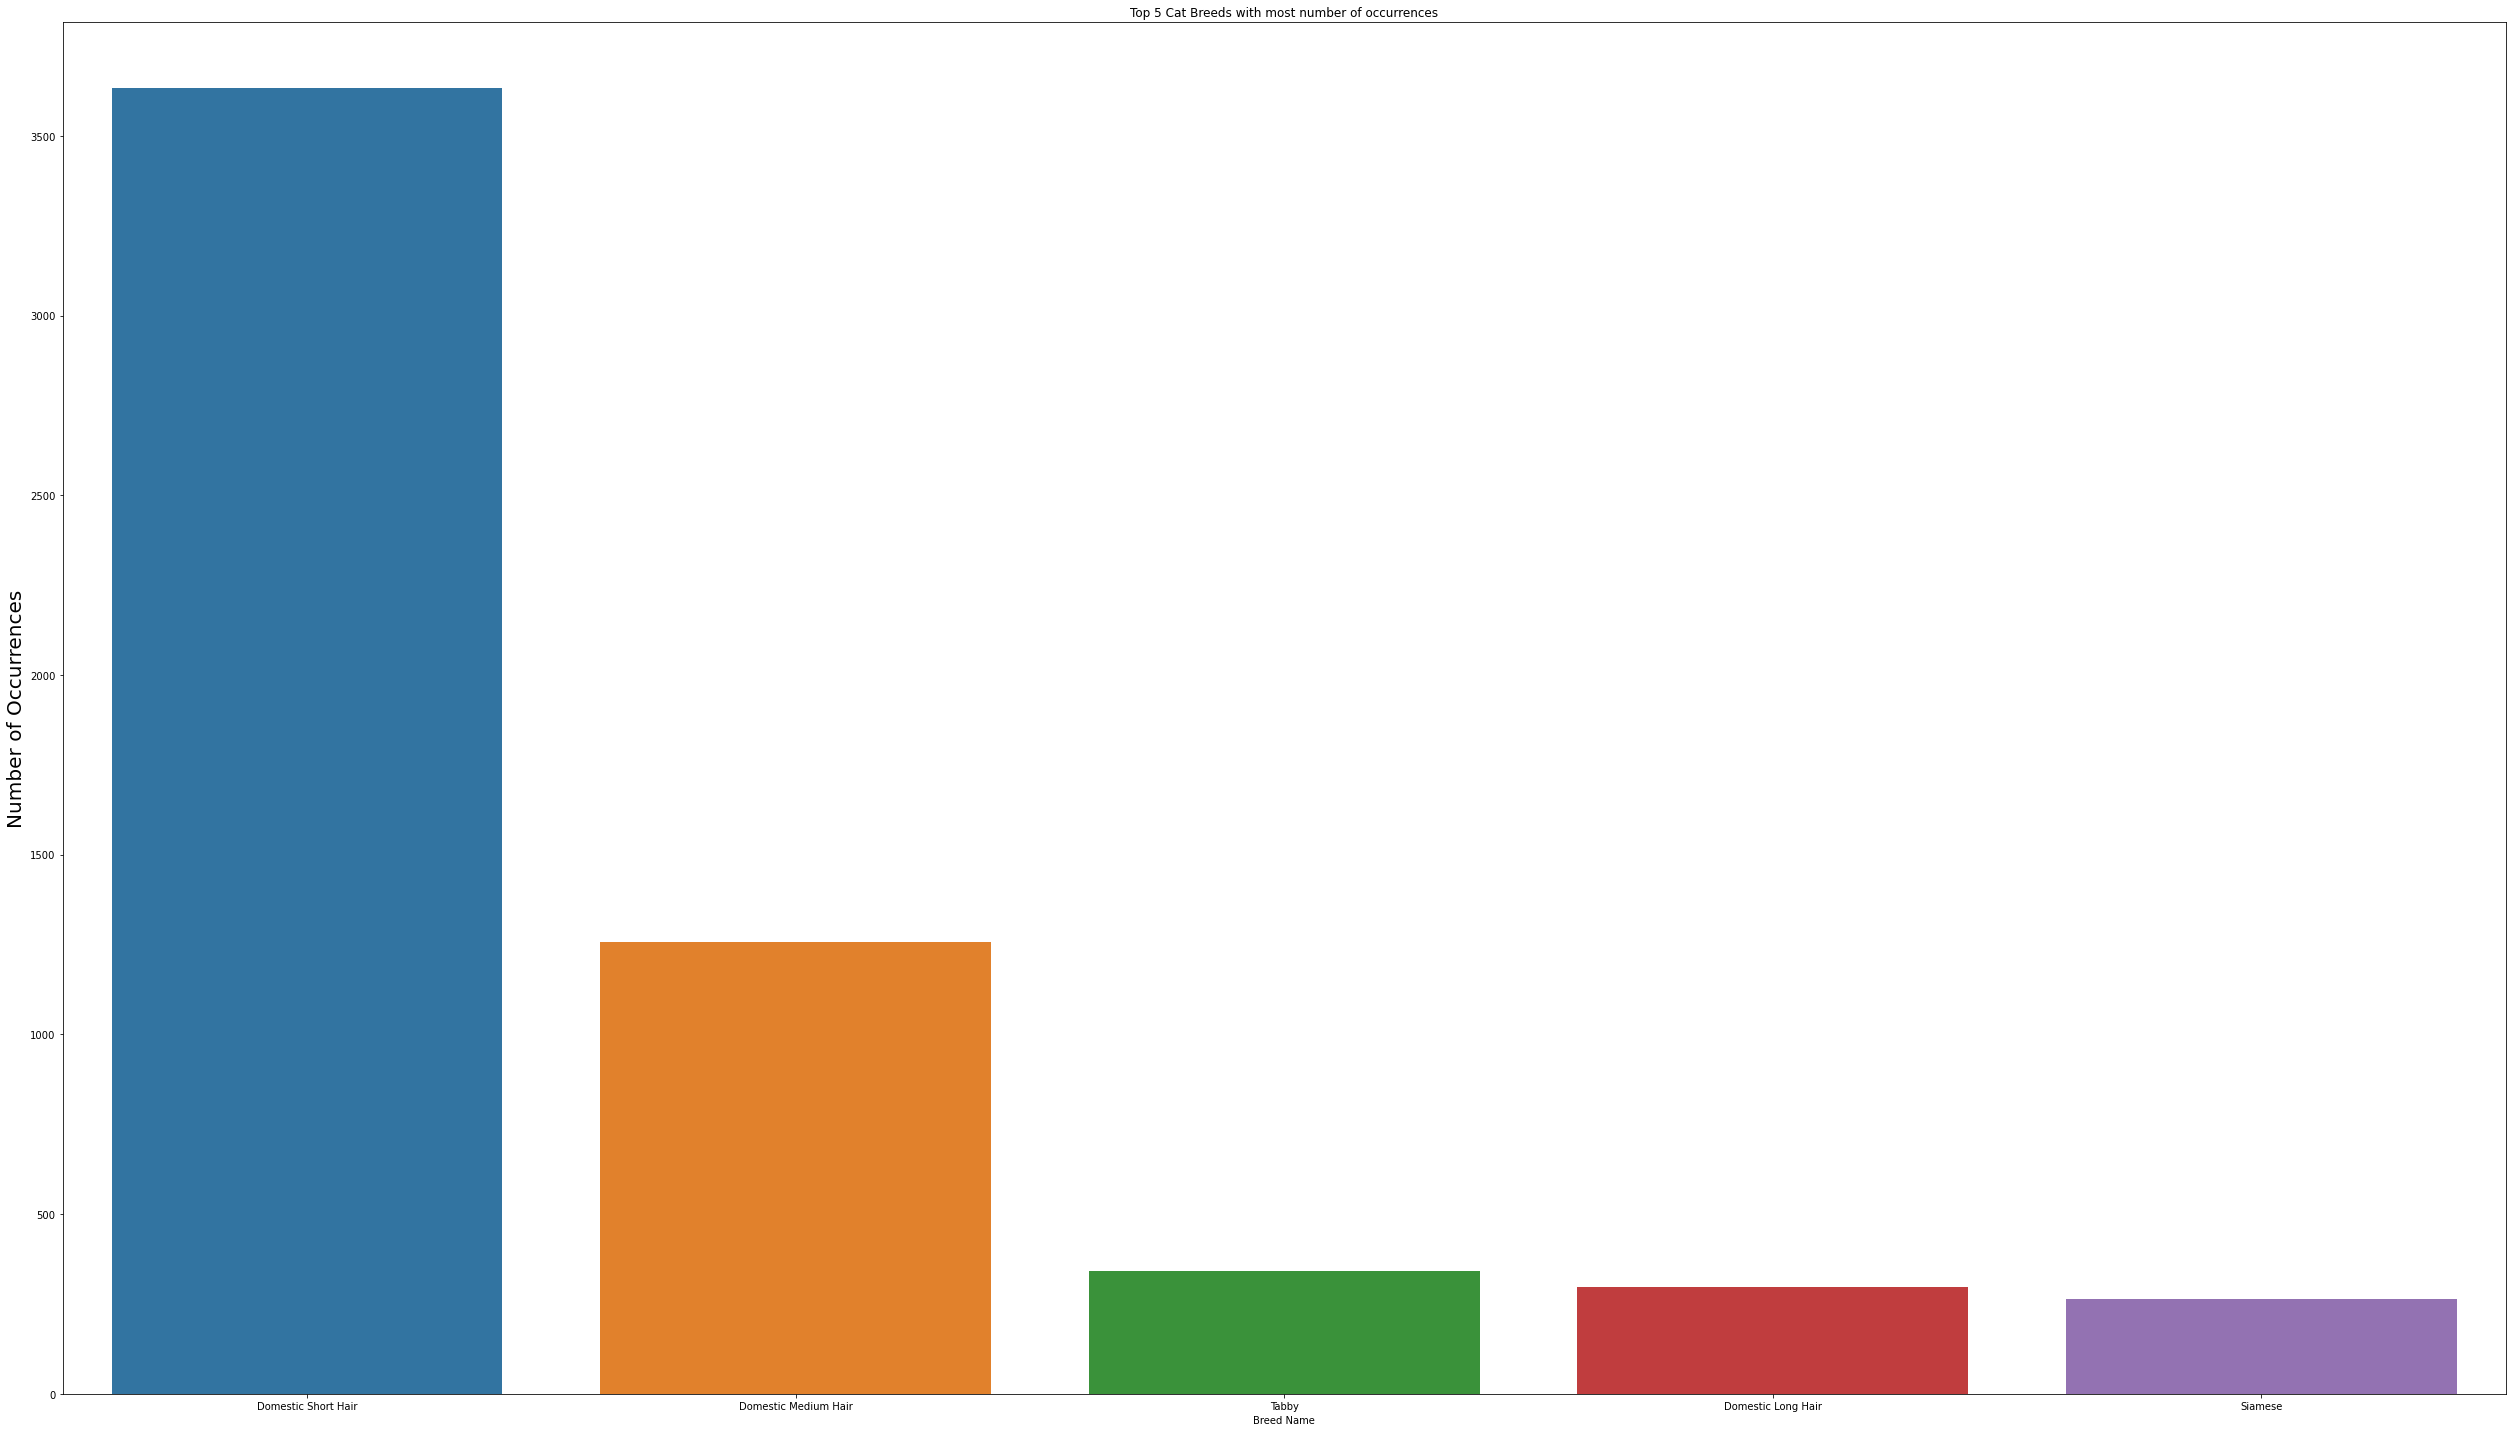

In [57]:
#plot for top 5 cat breeds based on occurences
Cat_Breed=data.loc[data['Type'] == 'Cat', 'BreedName1']
y1=Cat_Breed.value_counts()
y1=y1[:5]
plt.figure(figsize=(35,20))
sns.barplot(y1.index,  y1.values)
plt.title('Top 5 Cat Breeds with most number of occurrences')
plt.ylabel('Number of Occurrences', size=20)
plt.xlabel('Breed Name')
#plt.show()
plt.savefig('Top 5 Cat Breeds with most number of occurrences.png')


In [61]:
#domestic short hair breed vs other breeds plot
Type_Cat= data[data['Type'] == 'Cat']
Cat_Adoption_Speed = pd.crosstab(Type_Cat['BreedName1']== 'Domestic Short Hair', Type_Cat['AdoptionSpeed'])
Cat_Adoption_Speed

AdoptionSpeed,0,1,2,3,4
BreedName1,,,,,
False,148,875,840,557,807
True,92,780,1033,753,976


<Figure size 2304x2304 with 0 Axes>

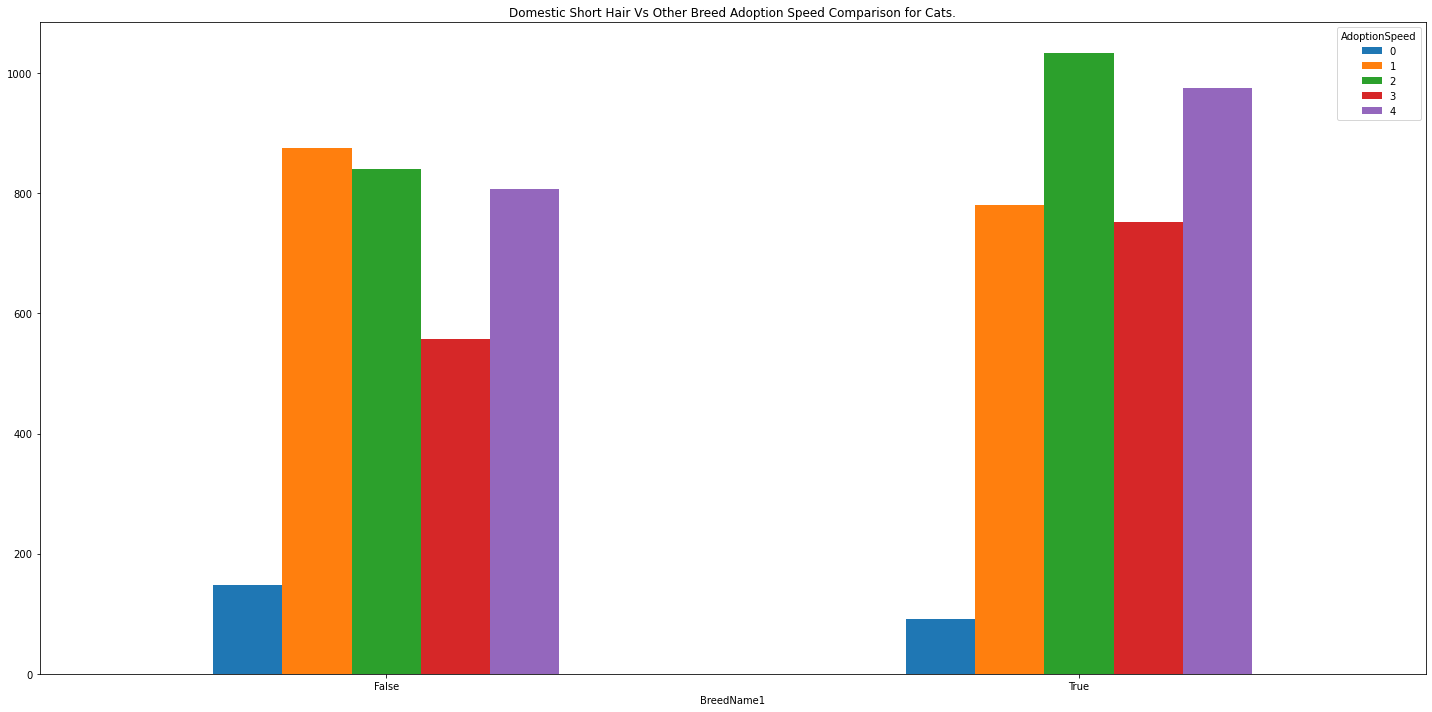

In [62]:
plt.figure(figsize=(32,32))
barplot=Cat_Adoption_Speed.plot.bar(rot=0)
plt.title('Domestic Short Hair Vs Other Breed Adoption Speed Comparison for Cats.')
plt.savefig('Domestic Short Hair Vs Other Breed Adoption Speed Comparison.png')
#plt.show()

In [63]:
#mixed breed vs other breeds plot
Type_Dog= data[data['Type'] == 'Dog']
Dog_Adoption_Speed = pd.crosstab(Type_Dog['BreedName1']== 'Mixed Breed', Type_Dog['AdoptionSpeed'])
Dog_Adoption_Speed

AdoptionSpeed,0,1,2,3,4
BreedName1,,,,,
False,89,576,589,568,387
True,81,859,1575,1381,2027


<Figure size 2304x2304 with 0 Axes>

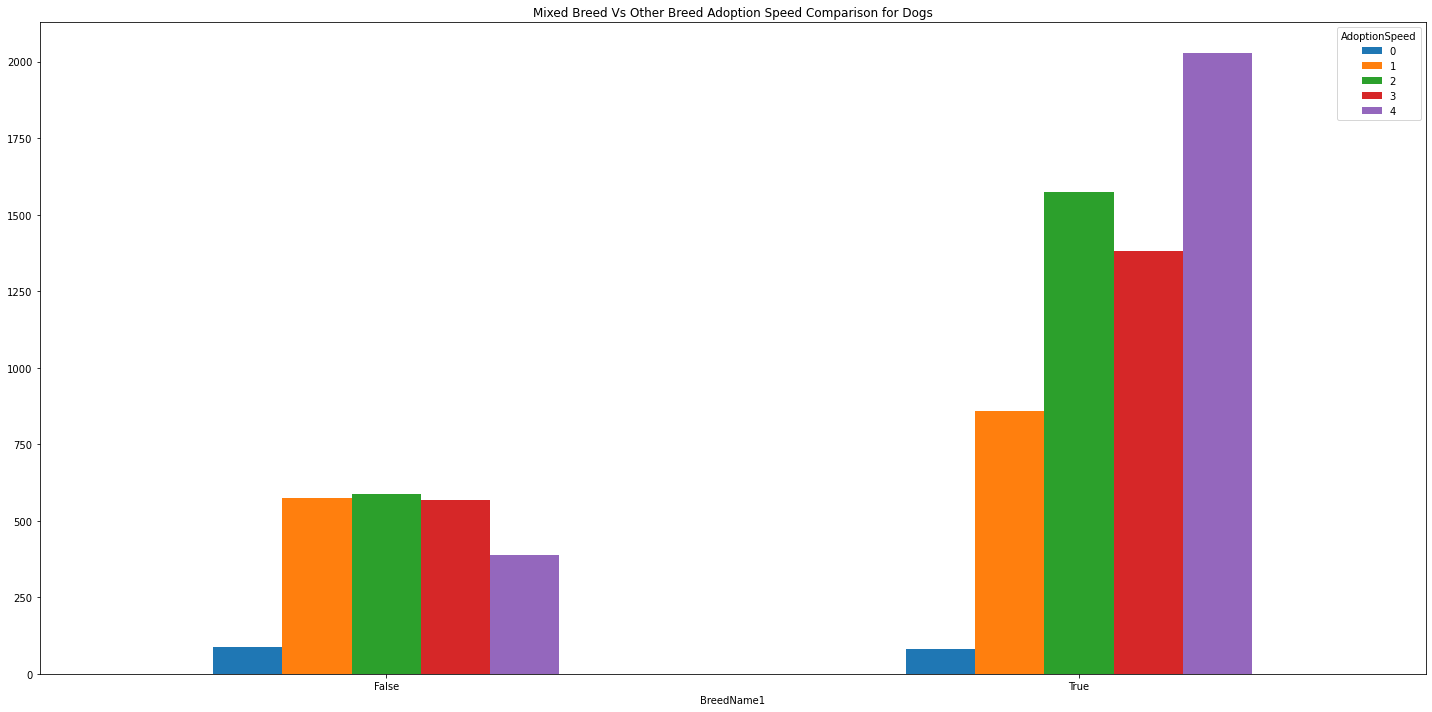

In [64]:
plt.figure(figsize=(32,32))
barplot=Dog_Adoption_Speed.plot.bar(rot=0)
plt.title('Mixed Breed Vs Other Breed Adoption Speed Comparison for Dogs')
plt.savefig('Mixed Breed Vs Other Breed Adoption Speed Comparison.png')
#plt.show()

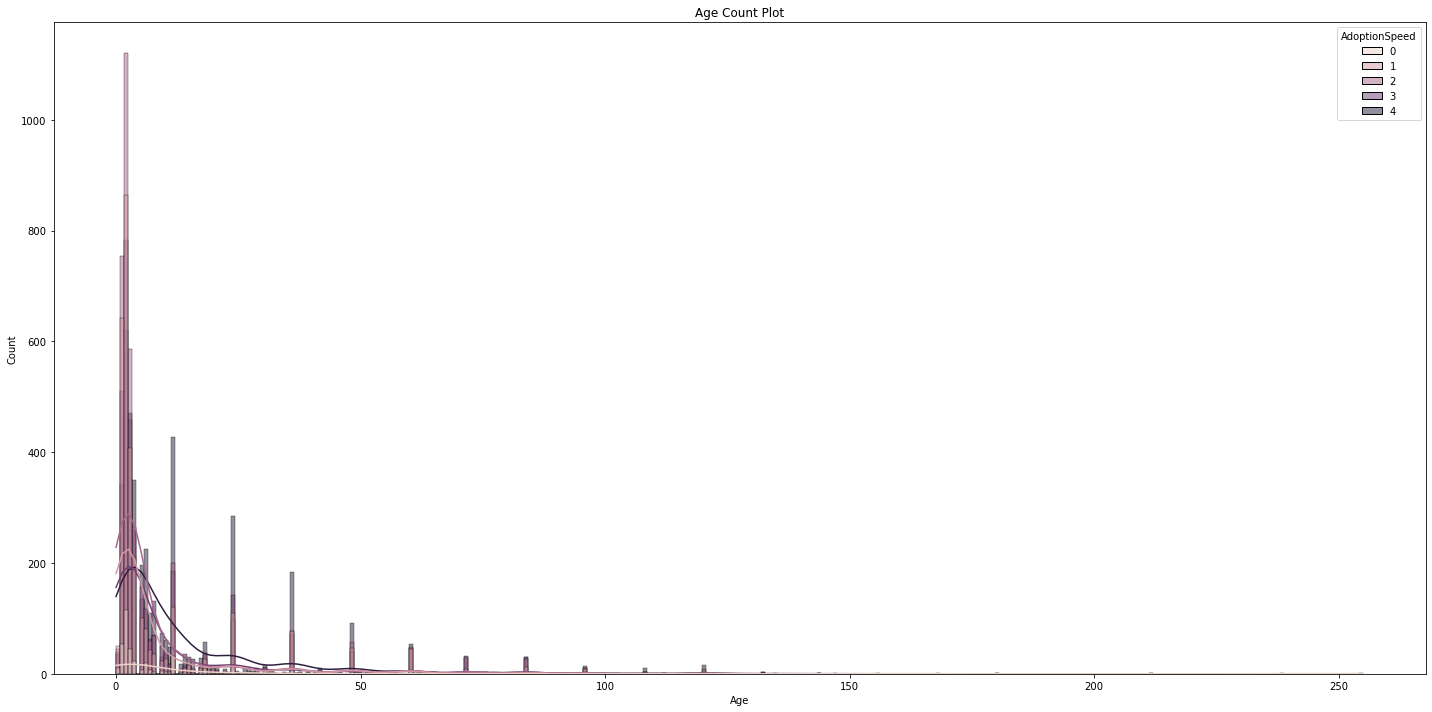

In [54]:
#hist plot for age distribution
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='Age', hue='AdoptionSpeed', kde=True, color='Paired')
plt.title('Age Count Plot')
plt.savefig('Age Count Plot')

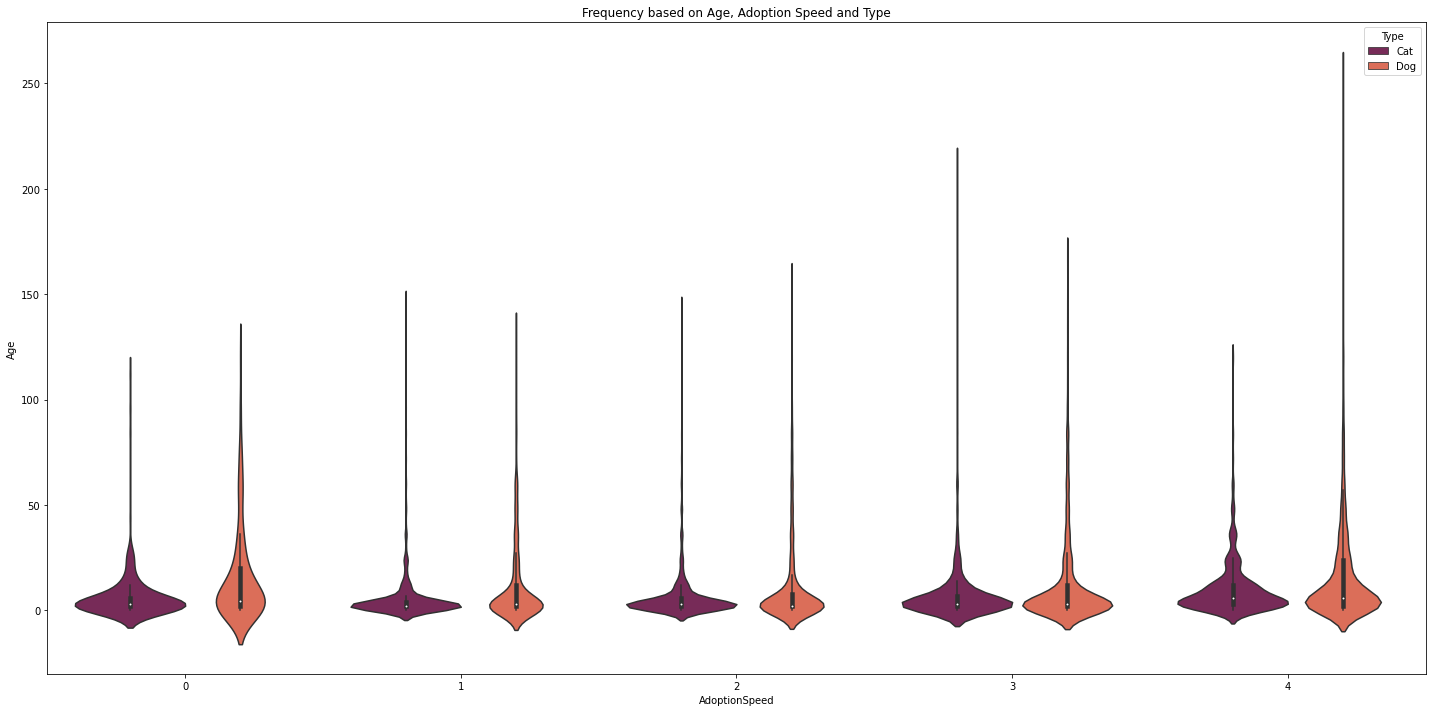

In [55]:
# Violin plot for Adoption Speed based on Age
sns.violinplot(x='AdoptionSpeed', y='Age', hue='Type', data=data, sizes=(20,200), palette='rocket')
plt.title('Frequency based on Age, Adoption Speed and Type')
plt.savefig('Frequency based on Age, Adoption Speed and Type.png')

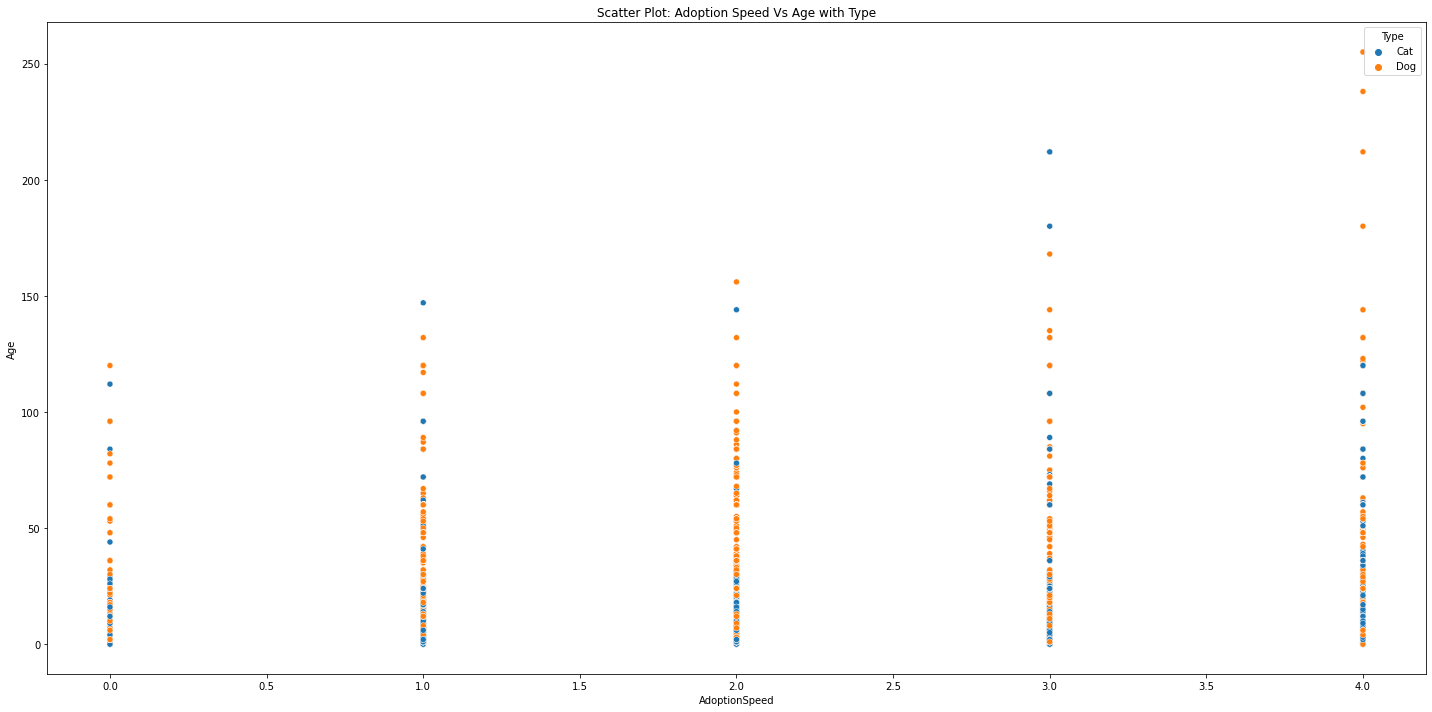

In [53]:
#scatterplot for age, adoption speed and type
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='AdoptionSpeed', y='Age', hue='Type')
plt.title('Scatter Plot: Adoption Speed Vs Age with Type')
plt.savefig('ScatterAdoptionVAge.png')

### Adoption speed based on Gender

In [134]:
data['Gender'].value_counts()

Female    7277
Male      5536
Mixed     2180
Name: Gender, dtype: int64

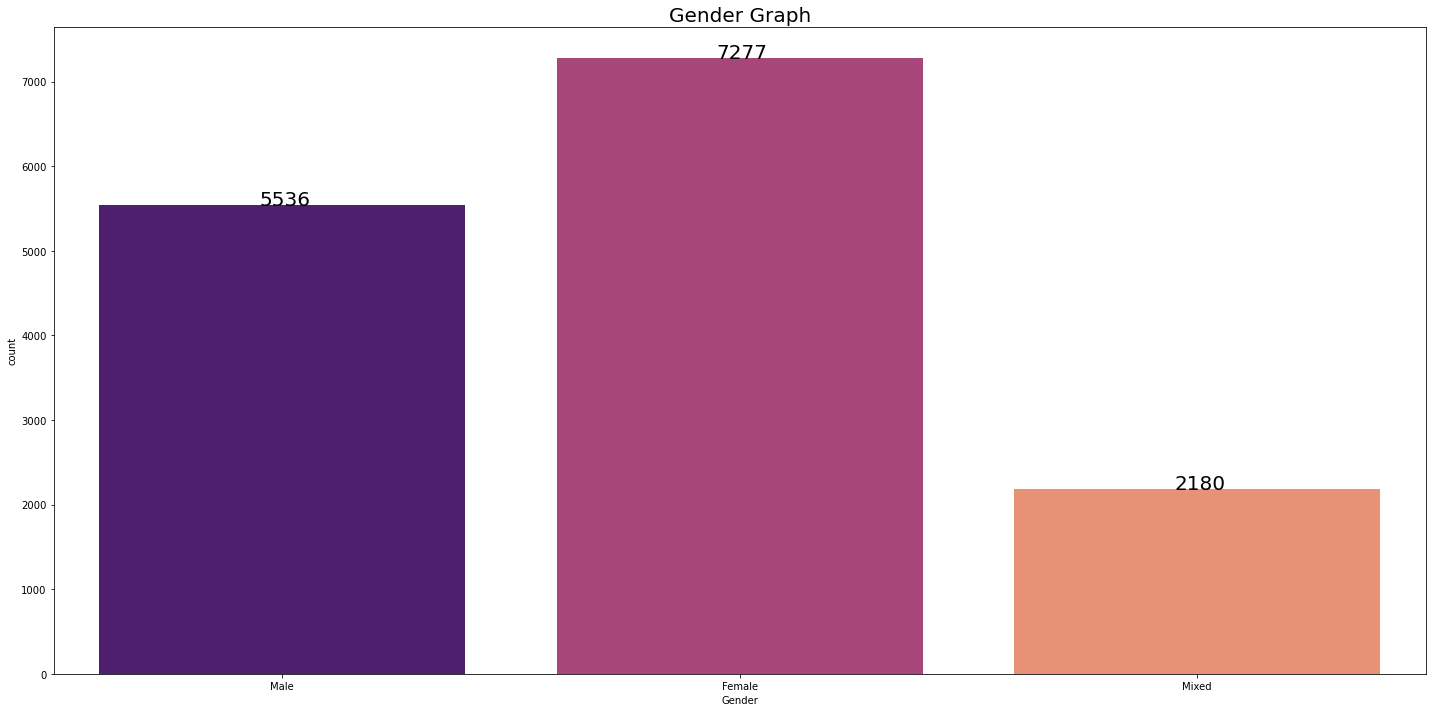

In [25]:
#gender count plot
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
Count_7=sns.countplot(x="Gender", data=data,palette='magma')
plt.title('Gender Graph', fontsize=20)

for p in Count_7.patches:
    Count_7.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.09), size=20)
#plt.show()

plt.savefig('Gender_Graph.png')


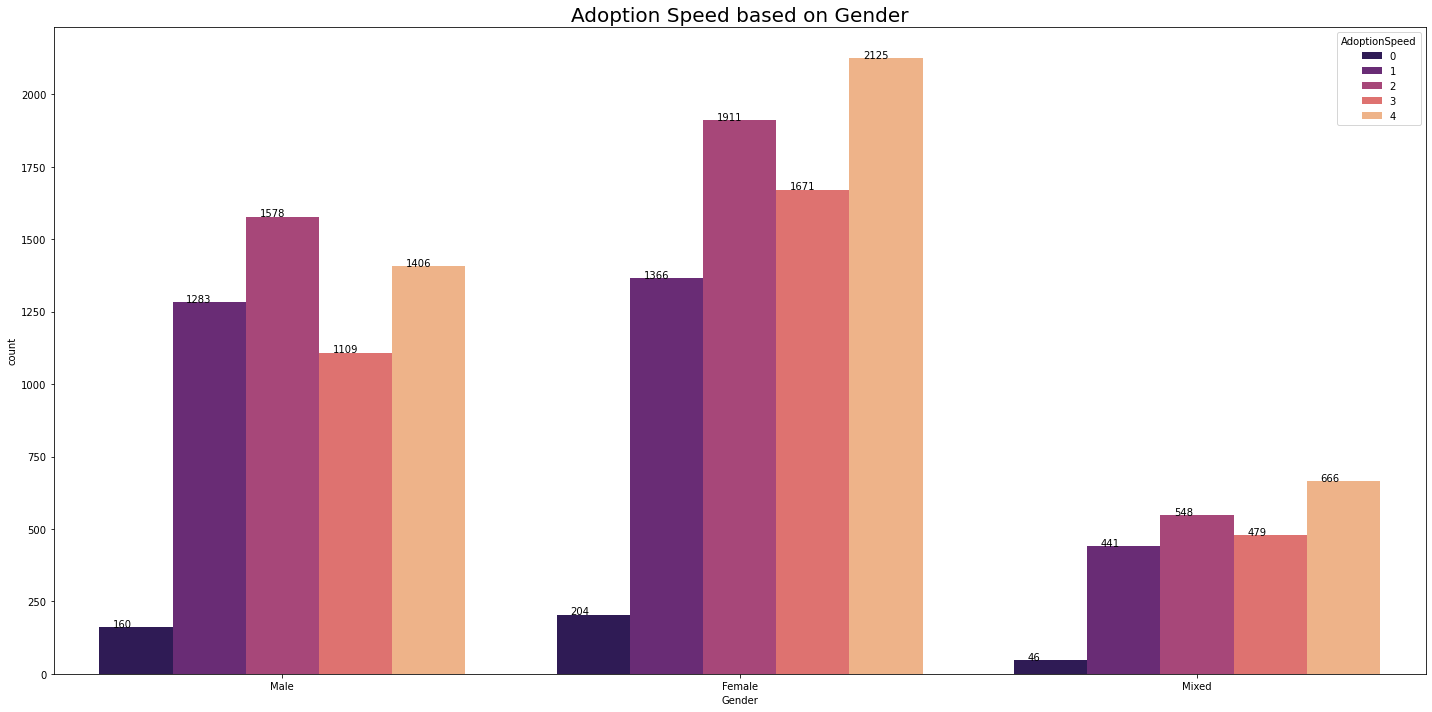

In [26]:
#Adoption Speed Based on Gender

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
Count_1=sns.countplot(x="Gender", data=data,hue = 'AdoptionSpeed',palette='magma')
plt.title('Adoption Speed based on Gender', fontsize=20)

for p in Count_1.patches:
    Count_1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.10))
#plt.show()
plt.savefig('Adoption_Gender_Graph.png')

In [185]:
data.loc[data['Gender'] == 'Female', 'AdoptionSpeed'].value_counts()

4    2125
2    1911
3    1671
1    1366
0     204
Name: AdoptionSpeed, dtype: int64

### Adoption Speed based on Color

In [113]:
data['ColorName1'].value_counts()

Black     7427
Brown     3750
Golden     947
Cream      884
Gray       684
White      667
Yellow     634
Name: ColorName1, dtype: int64

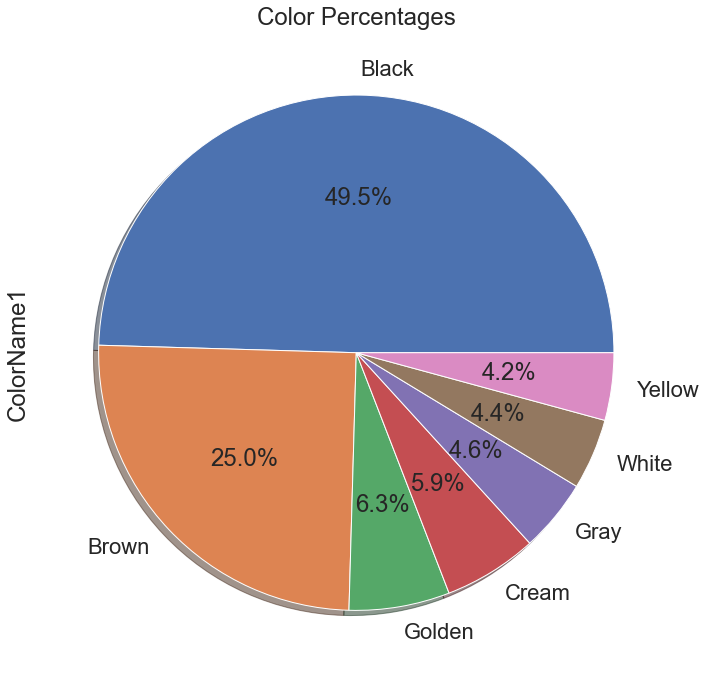

In [829]:
#Plot for Color 
data['ColorName1'].value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')
plt.title('Color Percentages')
plt.savefig('Color_Percentage.png')

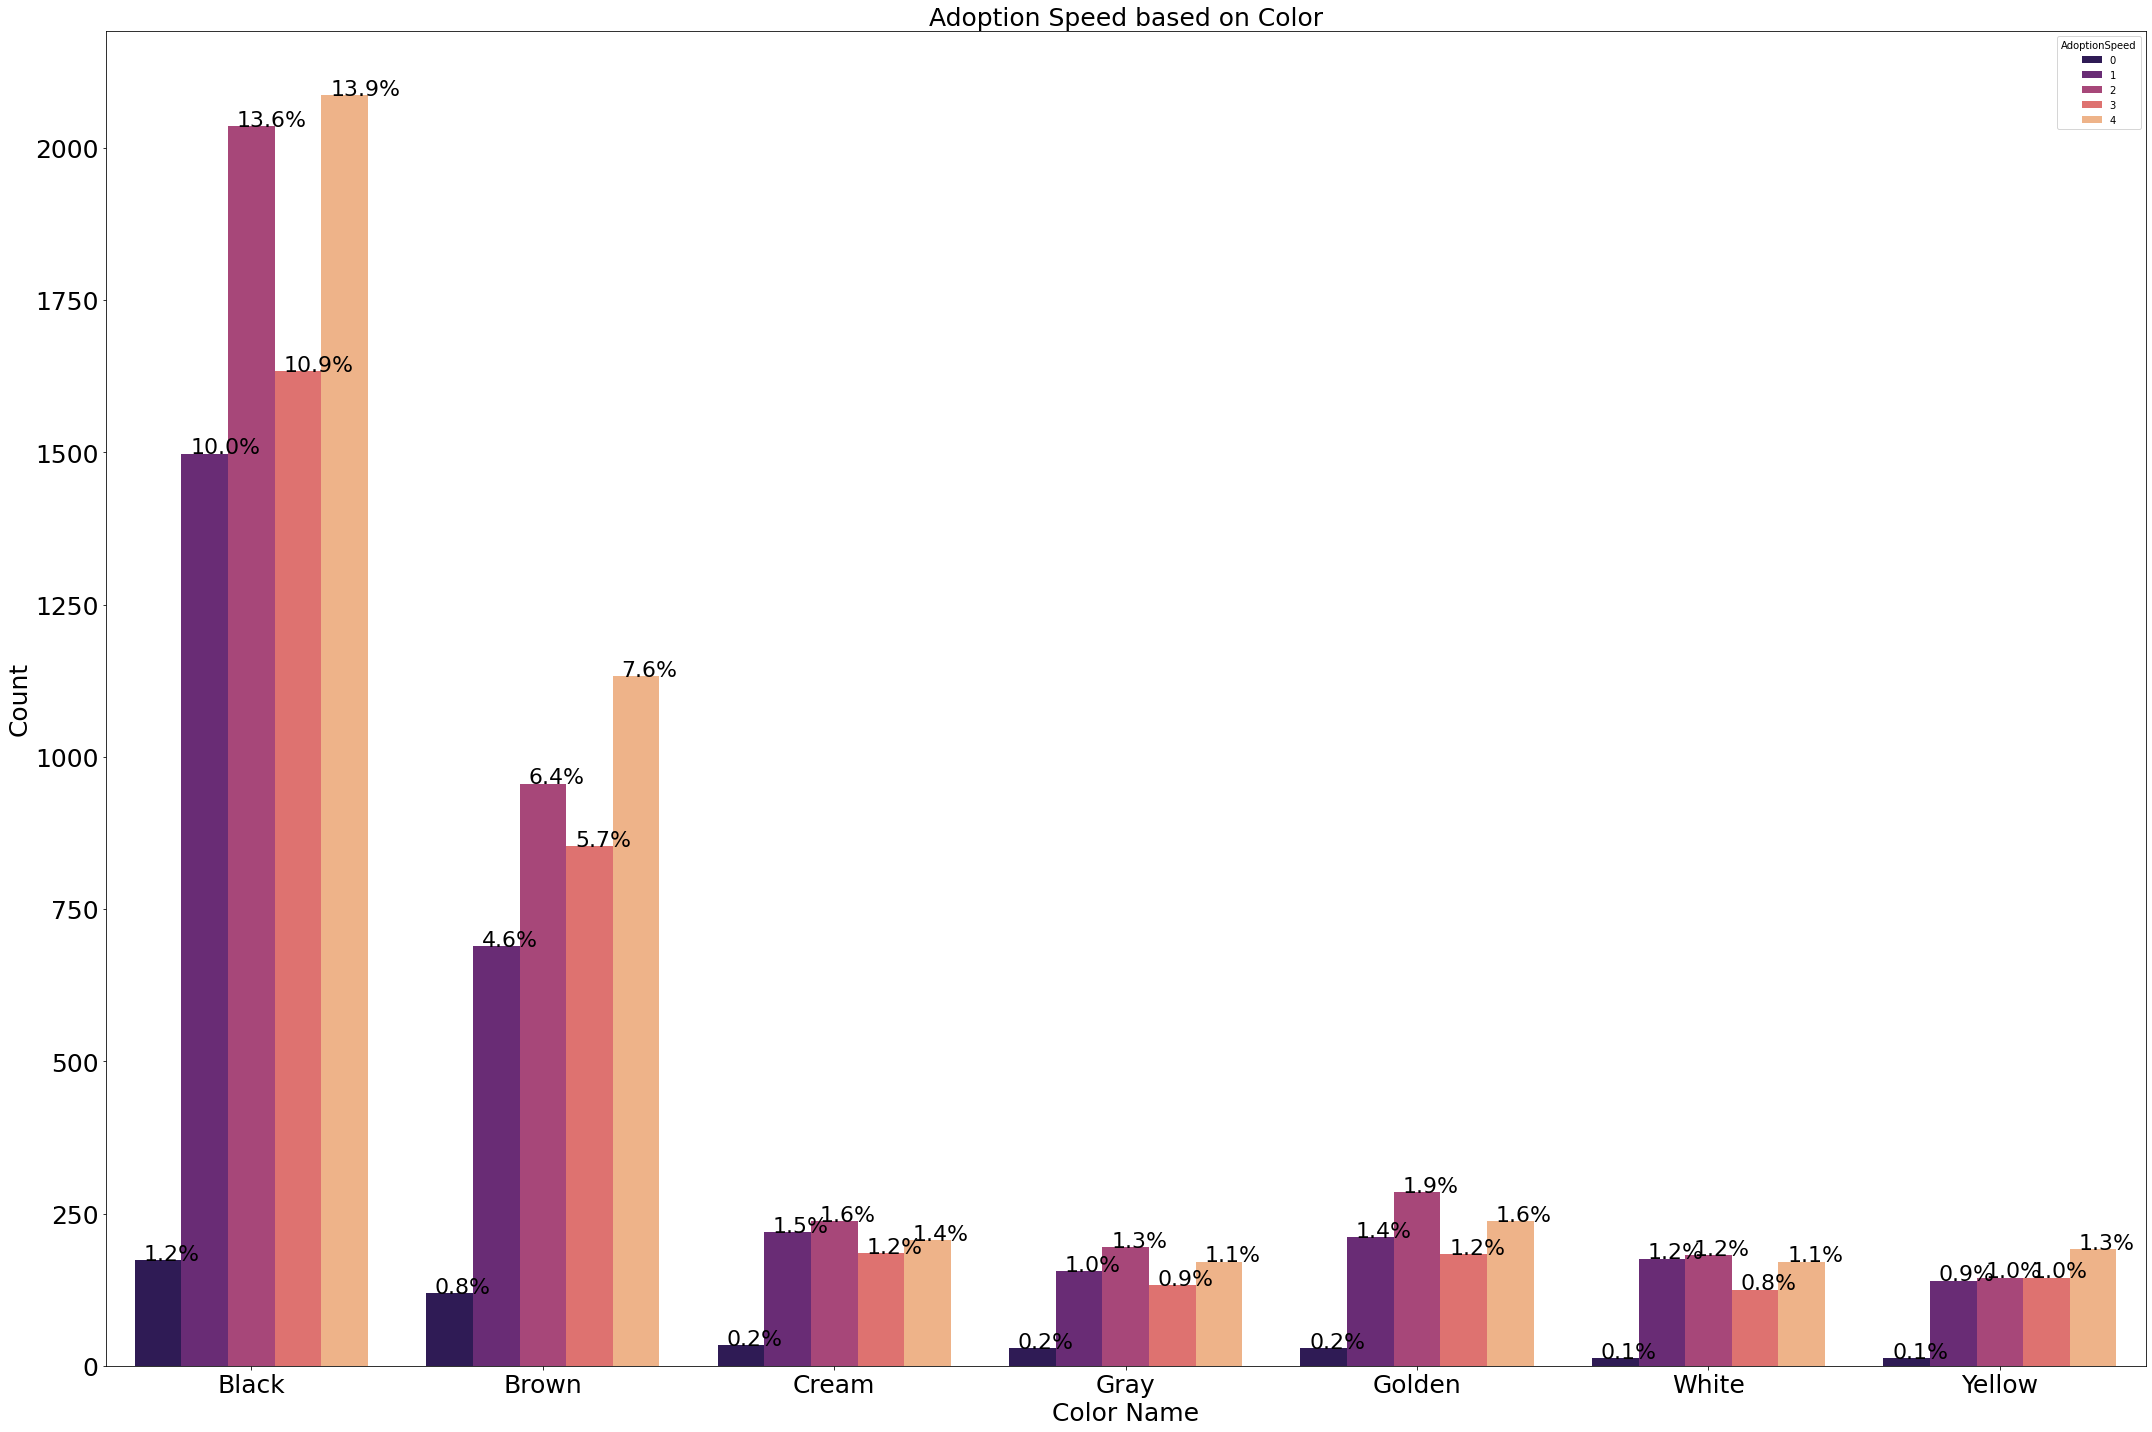

In [27]:
#Count Plot for Adoption Speed based on Color
plt.figure(figsize=(30,20))
total = float(len(data))
ax=sns.countplot(x="ColorName1", data=data,hue = 'AdoptionSpeed',palette='magma')
plt.xticks(size=25)
plt.xlabel('Color Name', size=25)
plt.yticks(size=25)
plt.ylabel('Count',size=25)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 22)

plt.title('Adoption Speed based on Color', size=25)
#plt.show()
plt.savefig('Adoption_Speed_Color.png')

<Figure size 720x1080 with 0 Axes>

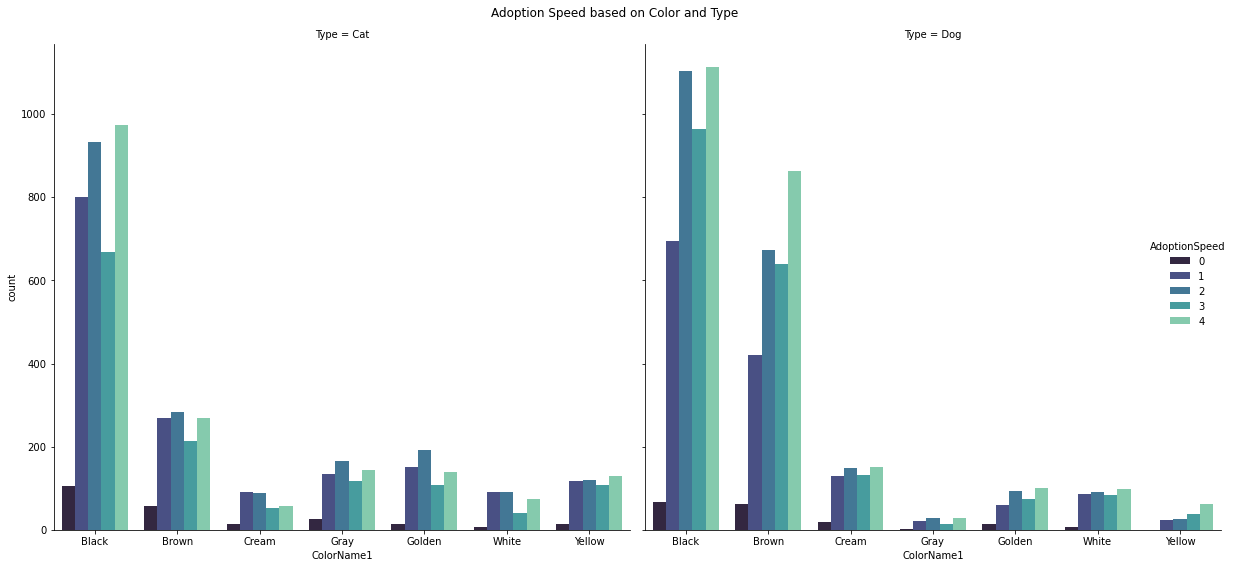

In [29]:
#Factorplot for adoption speed based on type and colors
plt.figure(figsize=(10,15))
sns.factorplot('ColorName1', col='Type', data=data, kind='count', hue='AdoptionSpeed', palette='mako',size=8)
plt.suptitle('Adoption Speed based on Color and Type')
plt.subplots_adjust(top=0.8)
plt.savefig('Adoption Speed based on Color and Type.png')

<Figure size 720x1440 with 0 Axes>

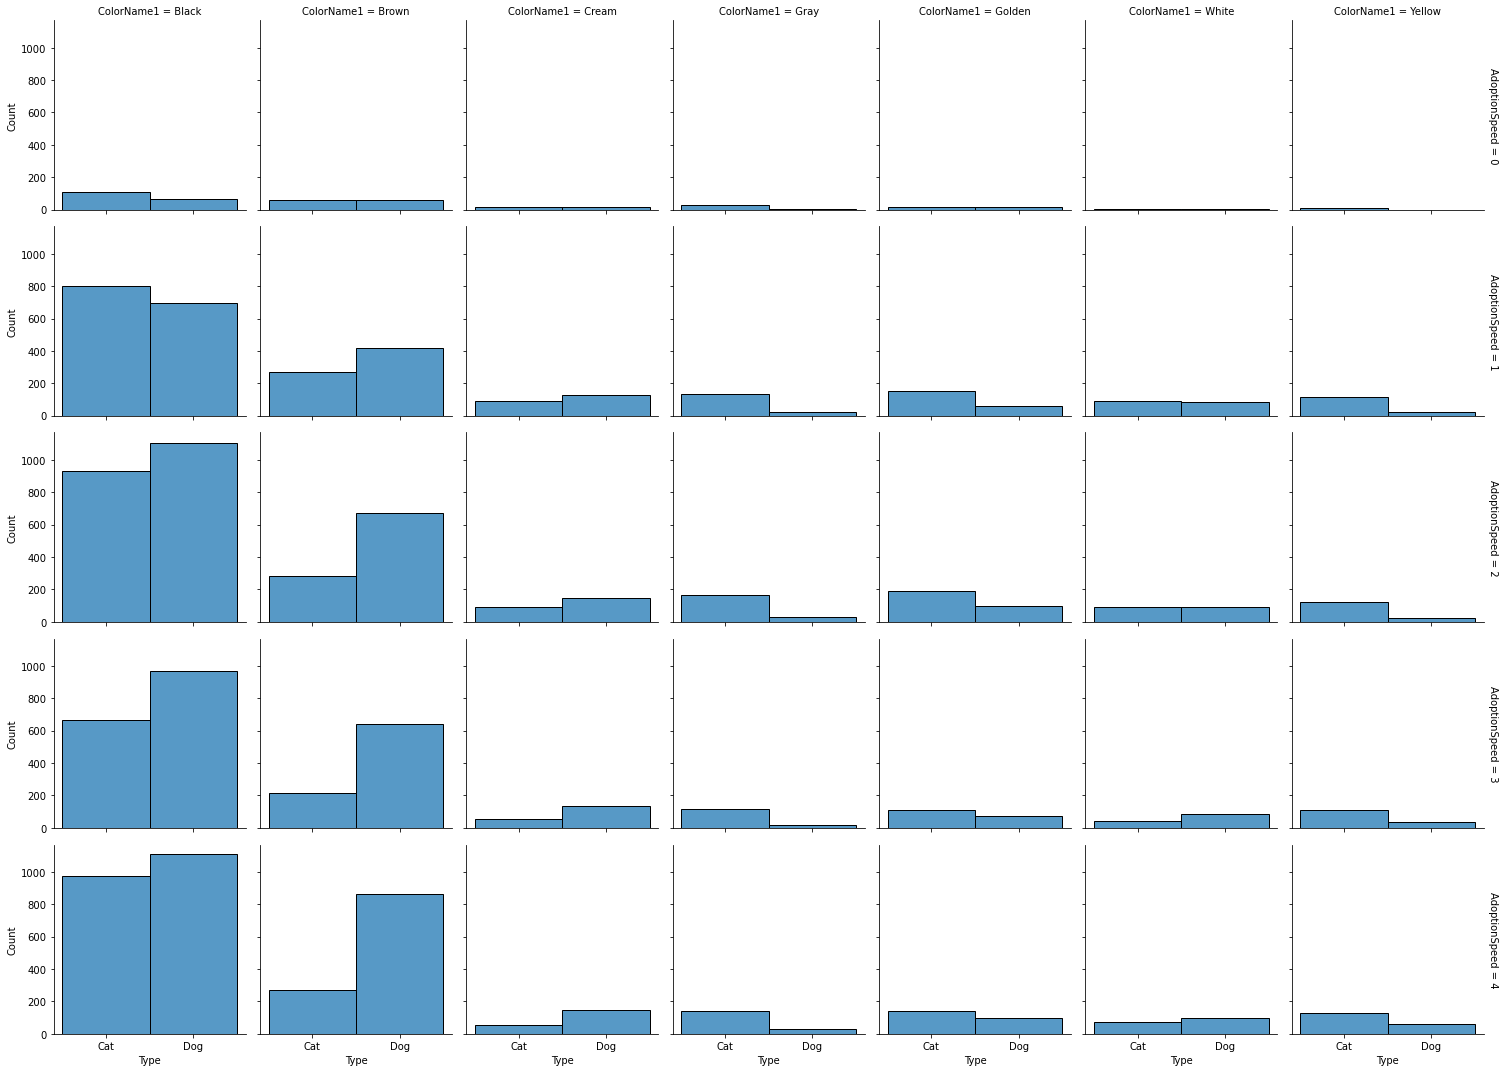

In [30]:
#Displot for color, adoption speed and type
plt.figure(figsize=(10,20))
sns.displot(
    data, x="Type", col="ColorName1", row="AdoptionSpeed",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)
plt.savefig('Count based on Type and Color.png')

### Adoption Speed based on Maturity size

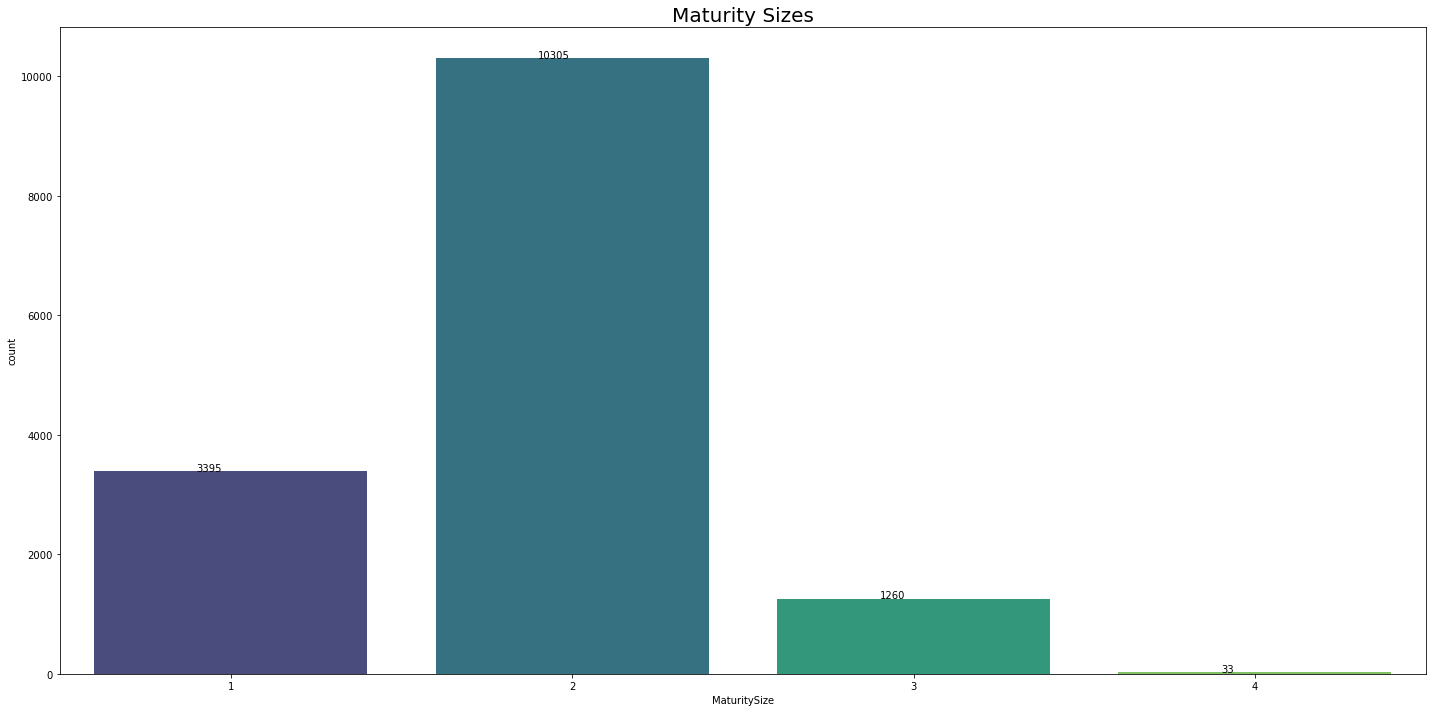

In [31]:
#countplot for maturity size
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
Count_2=sns.countplot(x="MaturitySize", data=data,palette='viridis')
plt.title('Maturity Sizes', fontsize=20)

for p in Count_2.patches:
   Count_2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.09))
#plt.show()

plt.savefig('Maturity Size.png')


#sns.countplot(x='MaturitySize',data=data,palette='viridis')


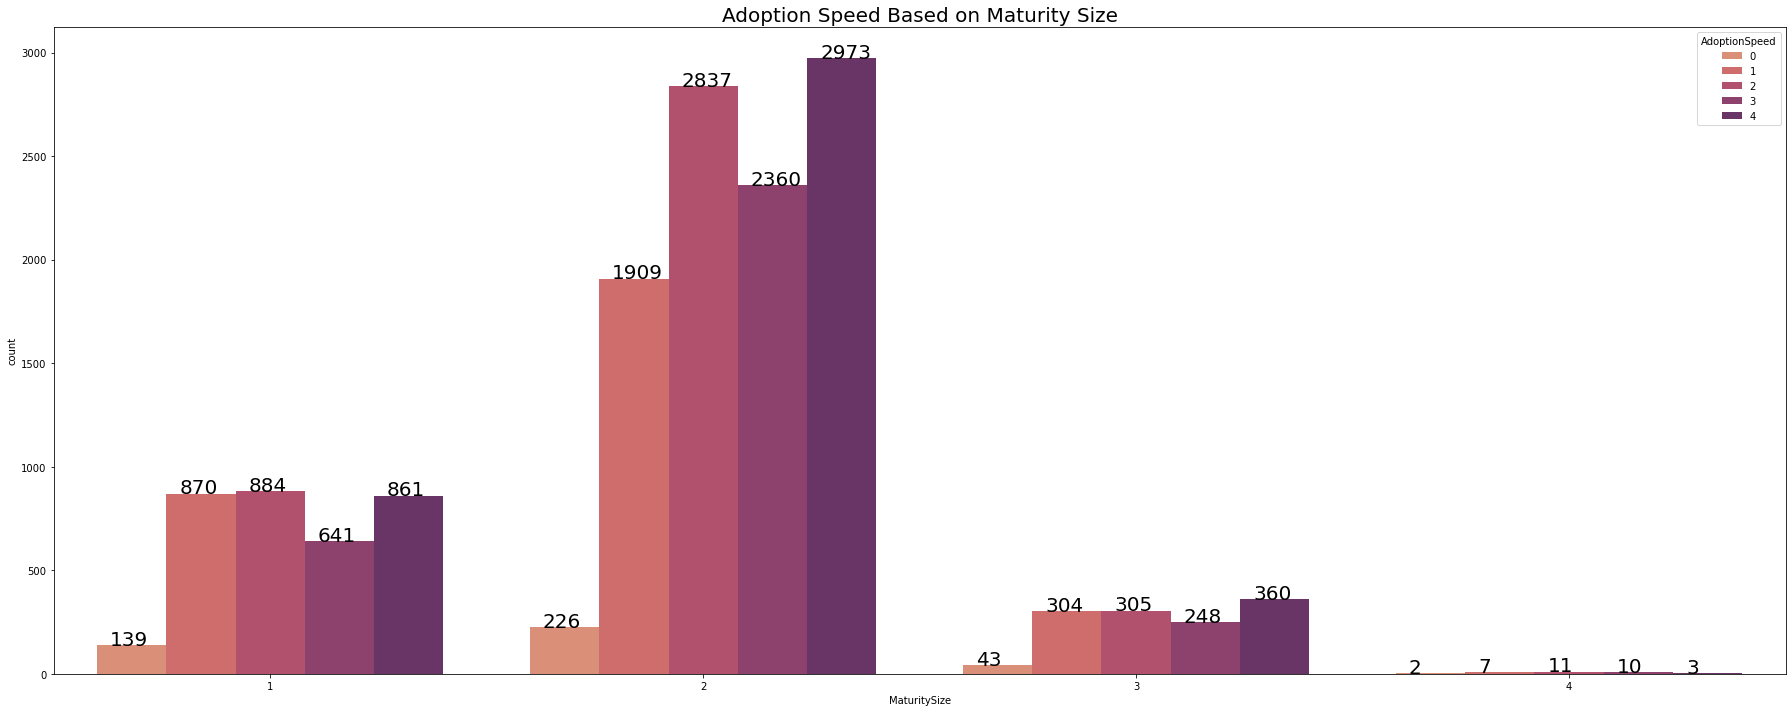

In [33]:
#countplot based on maturity and adoption speed
plt.rcParams["figure.figsize"] = [25,10]
plt.rcParams["figure.autolayout"] = True
Count_8=sns.countplot(x="MaturitySize", hue='AdoptionSpeed', data=data,palette='flare')
plt.title('Adoption Speed Based on Maturity Size', fontsize=20)

for p in Count_8.patches:
    Count_8.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.10), size=20)
#plt.show()
plt.savefig('Adoption_Maturity.png')


<Figure size 720x1080 with 0 Axes>

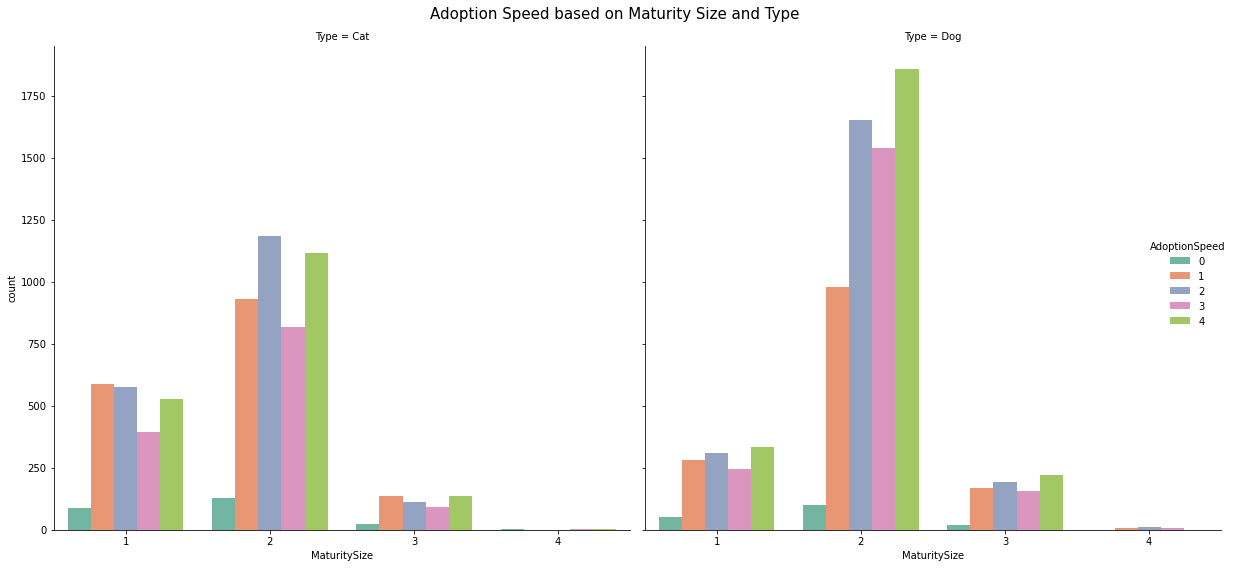

In [37]:
#factor plot for adoption speed based on type and maturity size
plt.figure(figsize=(10,15))
sns.factorplot('MaturitySize', col='Type', data=data, kind='count', hue='AdoptionSpeed', palette='Set2',size=8)
plt.suptitle('Adoption Speed based on Maturity Size and Type', size=15)
plt.subplots_adjust(top=0.8)
plt.savefig('Adoption Speed based on Maturity Size and Type.png')

### Adoption Speed based on Fur Length

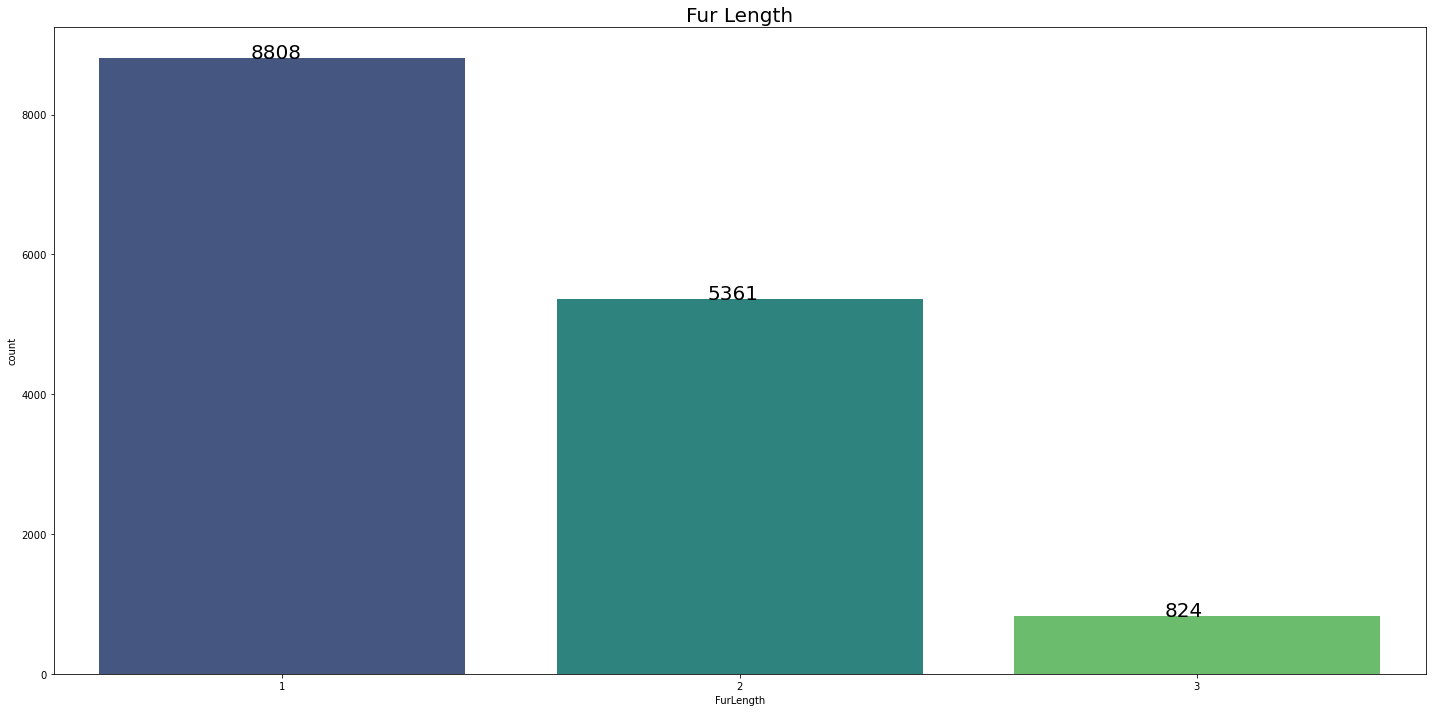

In [42]:
#countplot for fur length
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
Count_4=sns.countplot(x="FurLength", data=data,palette='viridis')
plt.title('Fur Length', fontsize=20)

for p in Count_4.patches:
    Count_4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+0.09), size=20)
#plt.show()

plt.savefig('FurLength.png') 




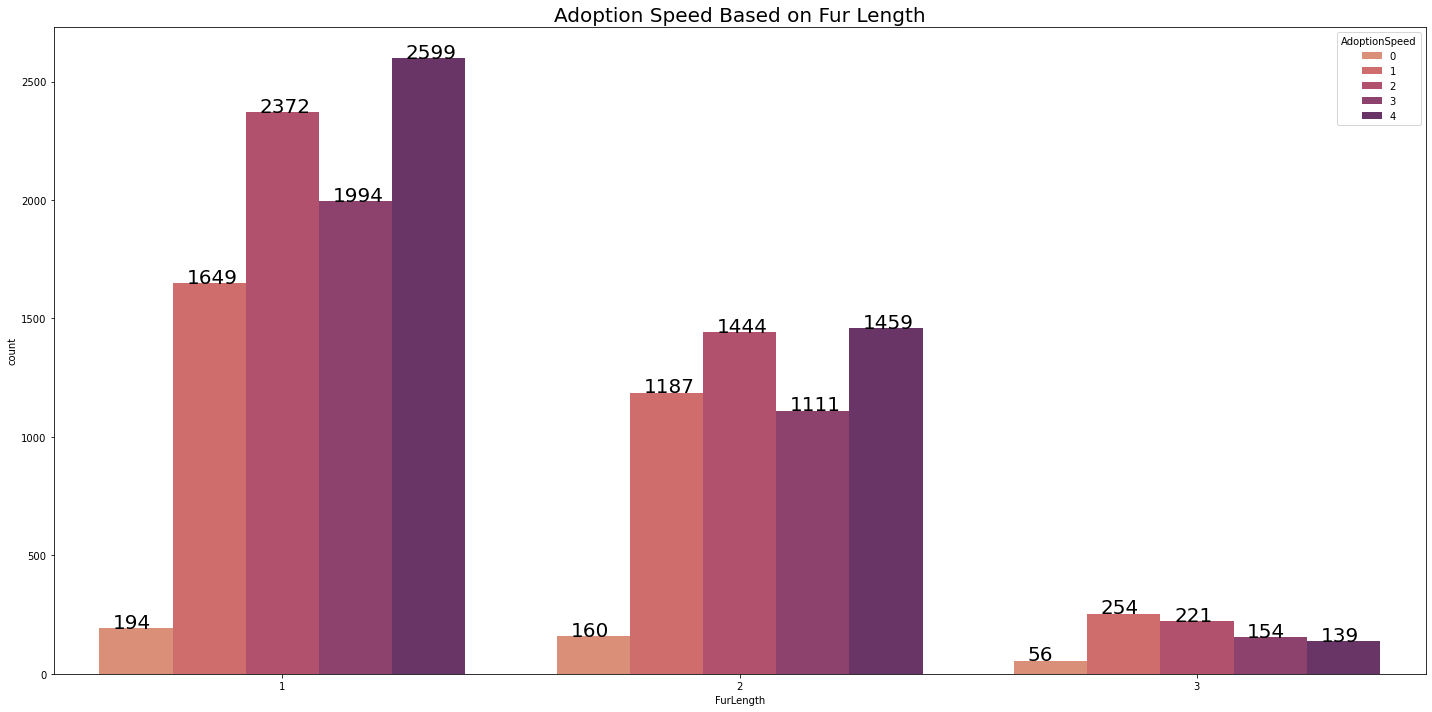

In [44]:
#Countplot for adoption speed based on fur length
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
Count_3=sns.countplot(x="FurLength", hue='AdoptionSpeed', data=data,palette='flare')
plt.title('Adoption Speed Based on Fur Length', fontsize=20)

for p in Count_3.patches:
    Count_3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.10), size=20)
#plt.show()
plt.savefig('Adoption Speed Based on Fur Length.png')


<Figure size 720x1080 with 0 Axes>

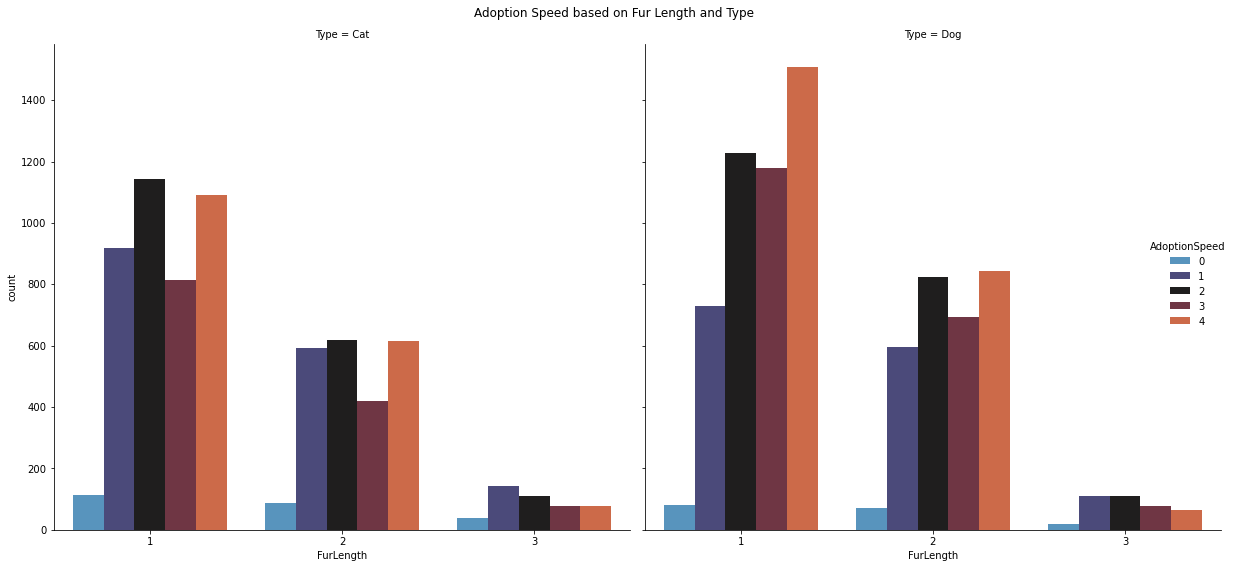

In [47]:
#Factor plot based on fur length an type
plt.figure(figsize=(10,15))
sns.factorplot('FurLength', col='Type', data=data, kind='count', hue='AdoptionSpeed', palette='icefire',size=8)
plt.suptitle('Adoption Speed based on Fur Length and Type')
plt.subplots_adjust(top=0.8)
plt.savefig('Adoption Speed based on Fur Length and Type.png')

### Adoption Speed based on Health

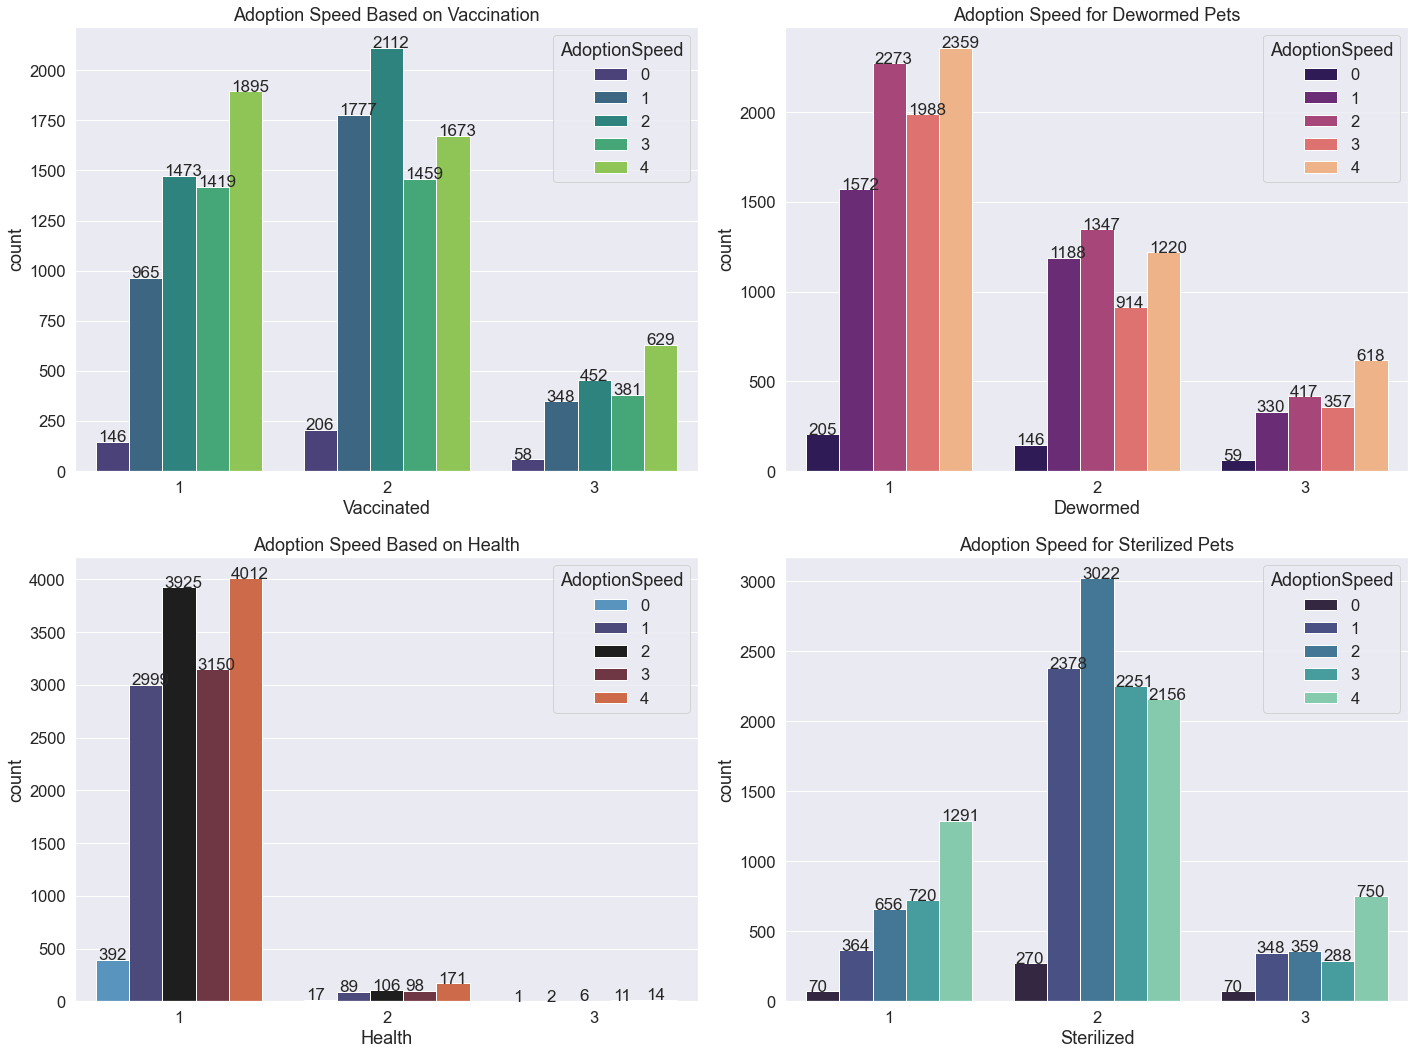

In [753]:
#Countplot for adoption speed based on health, vaccination, sterilized, dewormed
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
a1=sns.countplot(ax=axes[0, 0], data=data, x='Vaccinated', hue='AdoptionSpeed', palette='viridis')
a1.set_title("Adoption Speed Based on Vaccination")

a2=sns.countplot(ax=axes[0, 1], data=data, x='Dewormed', hue='AdoptionSpeed', palette='magma')
a2.set_title("Adoption Speed for Dewormed Pets")
a3=sns.countplot(ax=axes[1, 0], data=data, x='Health', hue='AdoptionSpeed', palette='icefire')
a3.set_title("Adoption Speed Based on Health")
a4=sns.countplot(ax=axes[1, 1], data=data, x='Sterilized', hue='AdoptionSpeed',palette='mako')
a4.set_title("Adoption Speed for Sterilized Pets")

array=[a1,a2,a3,a4]

for i in array:
    for p in i.patches:
        i.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.10), size=17)
#plt.show()

plt.savefig('Adoption_Health.png') 

### Adoption Speed based on Quantity, Fees, Photo Amount, Video Amount

In [566]:
data['Fee'].count()

14993

### Fee

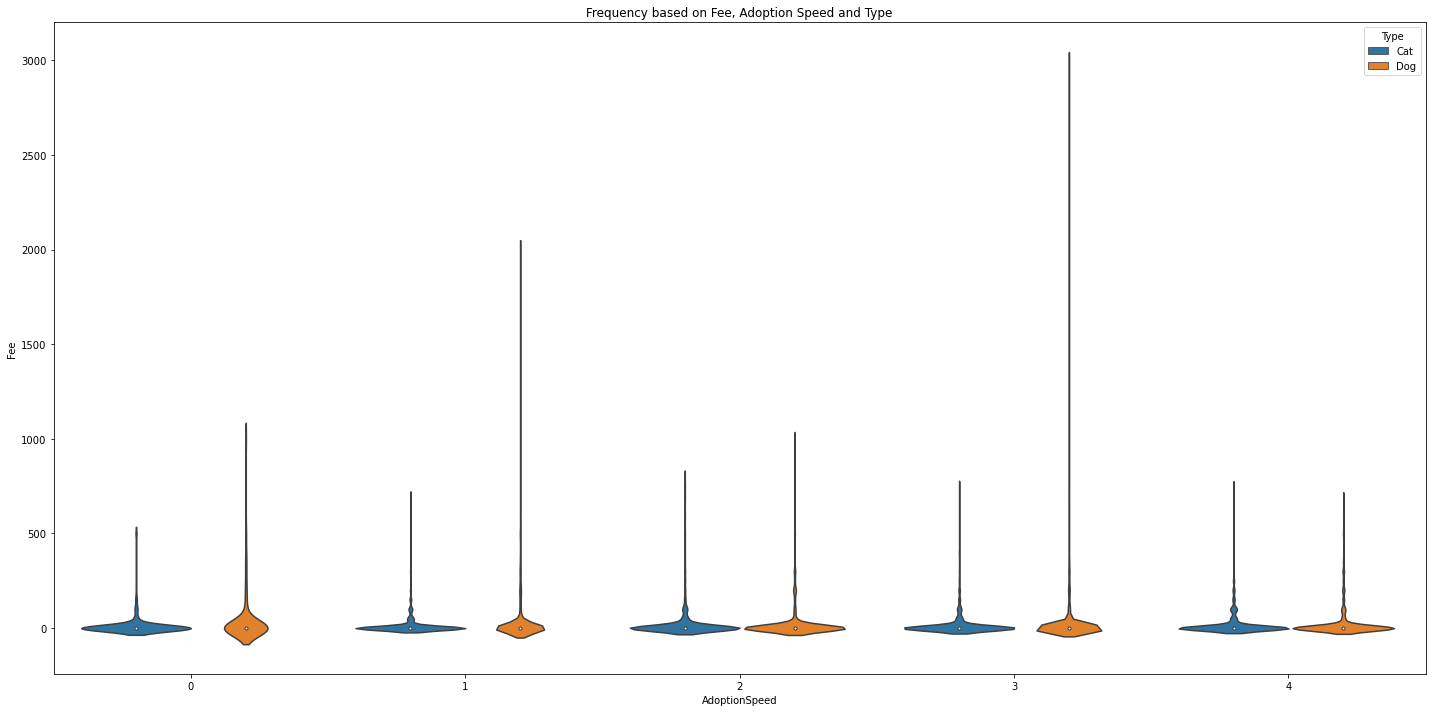

In [49]:
# Violinplot for Adoption Speed based on Fees
sns.violinplot(x='AdoptionSpeed', y='Fee', hue='Type', data=data)
plt.title('Frequency based on Fee, Adoption Speed and Type')
plt.savefig('Frequency based on Fee, Adoption Speed and Type.png')

### Quantity

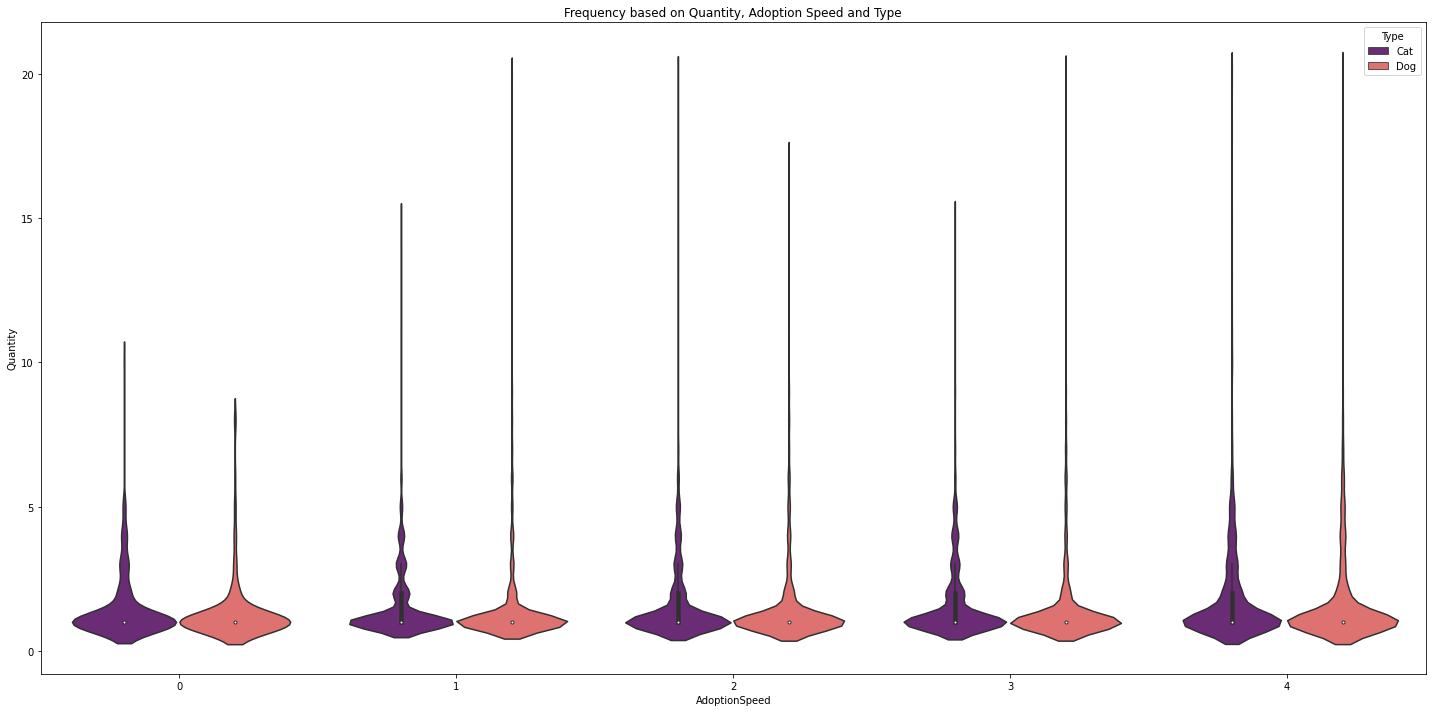

In [50]:
# Violin plot for Adoption Speed based on Quantity
sns.violinplot(x='AdoptionSpeed', y='Quantity', hue='Type', data=data, sizes=(20,200), palette='magma')
plt.title('Frequency based on Quantity, Adoption Speed and Type')
plt.savefig('Frequency based on Quantity, Adoption Speed and Type.png')

### Video amount 

In [484]:
#Based on Video Amount
data['VideoAmt'].value_counts()

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

In [489]:
"""Out of 14993 values, most of them have no videos. This field might be less useful because most of them are 0"""

'Out of 14993 values, most of them have no videos. This field might be less useful because most of them are 0'

### Photo amount

In [494]:
#Based on photo Amount
data['PhotoAmt'].max()

30

In [ ]:
"""The maximum number of photos that are available is 30."""

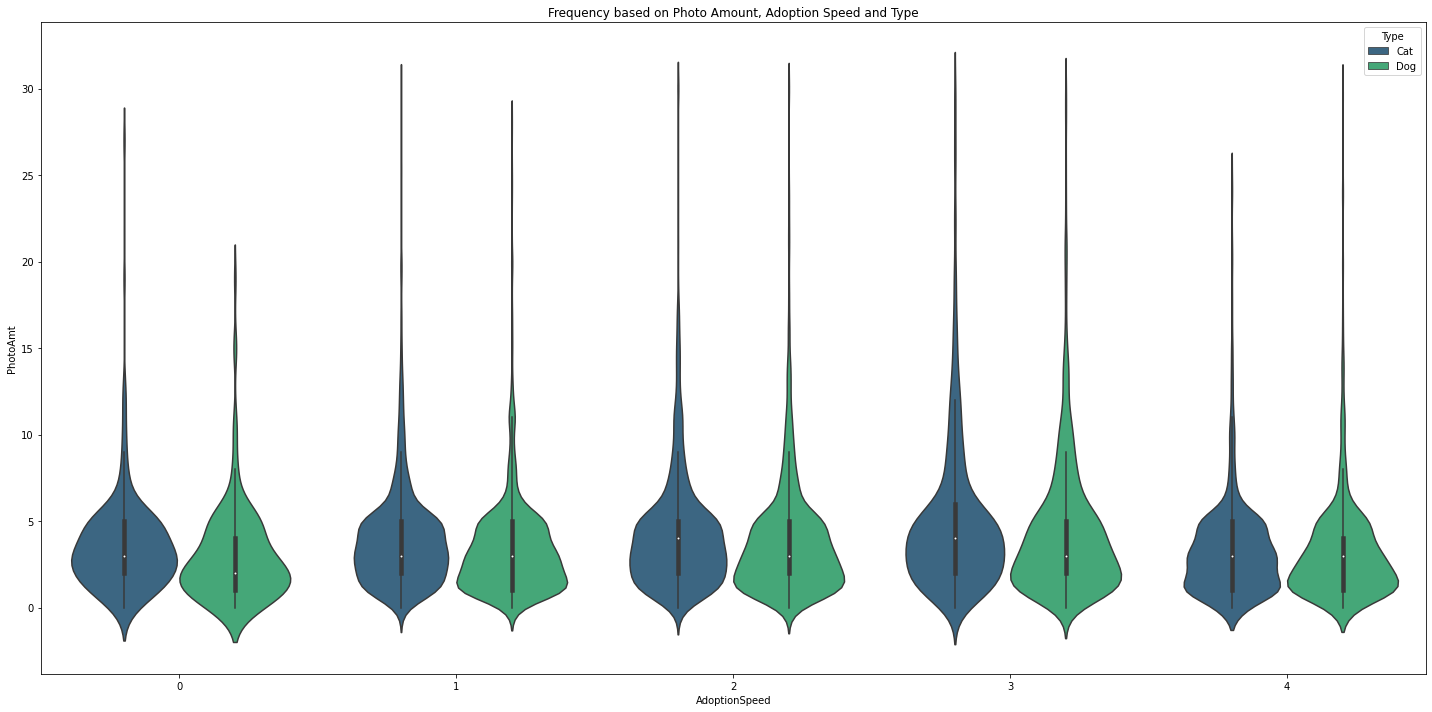

In [51]:
#violinplot for adoption speed based on photo amount
sns.violinplot(x='AdoptionSpeed', y='PhotoAmt', hue='Type', data=data, palette='viridis')
plt.title('Frequency based on Photo Amount, Adoption Speed and Type')
plt.savefig('Frequency based on Photo Amount, Adoption Speed and Type.png')

### Statewise Adoption Speed 

In [658]:
data['StateName'].value_counts()

Selangor           8714
Kuala Lumpur       3845
Pulau Pinang        843
Johor               507
Perak               420
Negeri Sembilan     253
Melaka              137
Kedah               110
Pahang               85
Terengganu           26
Sabah                22
Kelantan             15
Sarawak              13
Labuan                3
Name: StateName, dtype: int64

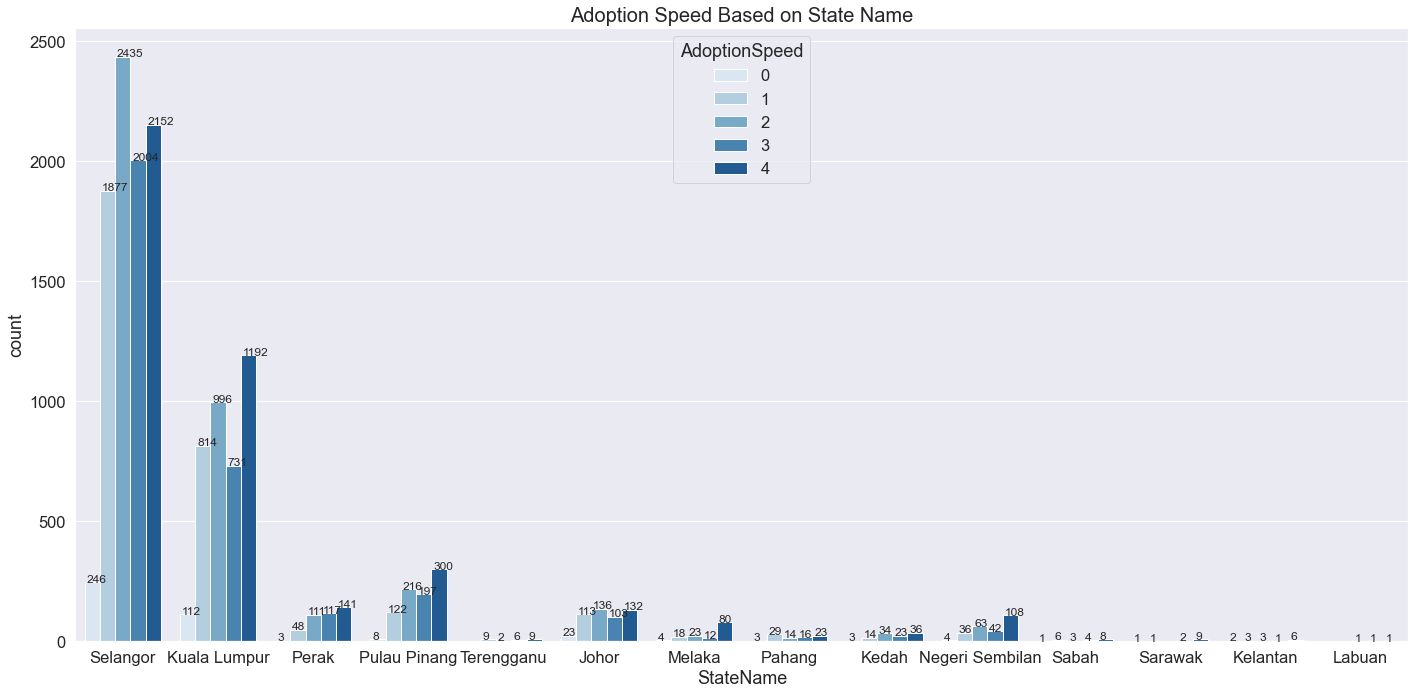

In [786]:
#countplot for adoption speed based on state names
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
Count_5=sns.countplot(x="StateName", hue='AdoptionSpeed', data=data,palette='Blues')
plt.title('Adoption Speed Based on State Name', fontsize=20)

for p in Count_5.patches:
    Count_5.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+0.10), size=12)
#plt.show()
plt.savefig('Adoption Speed Based on State Name.png')


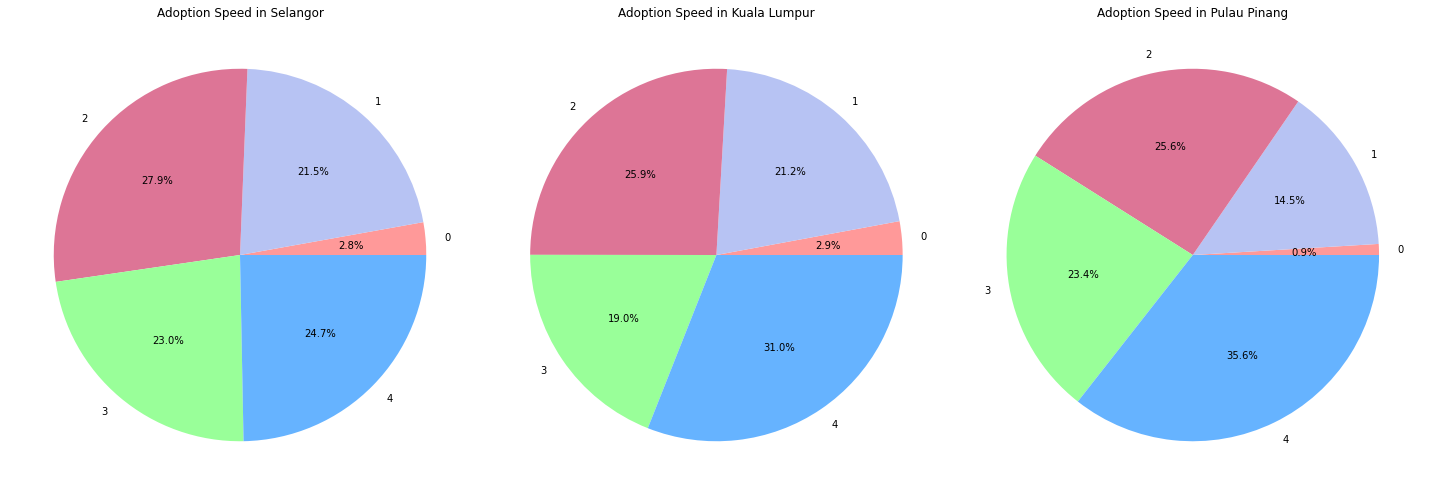

In [52]:
#pie charts for 3 states having most occurrences
fig, (ax5,ax6,ax7)= plt.subplots(1,3, figsize=(20,15))
lab=['0','1','2','3','4']
col2 = ['#ff9999', '#B7C3F3', '#DD7596', '#99ff99', '#66b3ff']

ax5.pie(data[data['StateName']== 'Selangor'].groupby(['AdoptionSpeed']).size(), autopct='%1.1f%%',labels=lab, colors=col2)
ax5.set_title("Adoption Speed in Selangor")
ax6.pie(data[data['StateName']== 'Kuala Lumpur'].groupby(['AdoptionSpeed']).size(), autopct='%1.1f%%', labels=lab, colors=col2)
ax6.set_title("Adoption Speed in Kuala Lumpur")
ax7.pie(data[data['StateName']== 'Pulau Pinang'].groupby(['AdoptionSpeed']).size(), autopct='%1.1f%%', labels=lab, colors=col2)
ax7.set_title("Adoption Speed in Pulau Pinang")
#plt.show()
plt.savefig('Adoption speed statewise.png')

### Description

In [81]:
pd.set_option('display.max_colwidth',-1)

In [83]:
data[['Name', 'Quantity','Description']].head(10)

,Name,Quantity,Description
0,Nibble,1,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.
1,No Name Yet,1,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.
2,Brisco,1,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me."
3,Miko,1,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!"
4,Hunter,1,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie."
5,NaN,1,"This is a stray kitten that came to my house. Have been feeding it, but cannot keep it."
6,BULAT,1,anyone within the area of ipoh or taiping who interested to adopt my cat can contact my father at this number (mazuvil)or can just email me. currently bulat is at my hometown at perak but anyone outside the area still want to adopt can travel there to my hometown.there is a lot of cats in my house rite now..i think i should let one of them go to a better owner who can give better attention to him.
7,Siu Pak & Her 6 Puppies,6,Siu Pak just give birth on 13/6/10 to 6puppies. Interested pls call or sms me. Left 2female puppies on 2/7/10
8,NaN,1,"healthy and active, feisty kitten found in neighbours' garden. Not sure of sex."
9,Kitty,1,"Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting."


In [87]:
Data_Des=data.loc[data['Quantity'] > 15][['Name', 'Quantity','Description']]
Data_Des

,Name,Quantity,Description
263,20 Little Puppies,20,"These are 20 puppies, from 2 stray mums need good homes. They are 2 weeks old. If you can give them a good home without caging or chaining, please whatsapp or msg Ms Grace Bong tel no:"
320,18 Cats For NEED HOMES!!,18,"YOU can CONTACT the couple at if you are interested. MORE pictures available here: THE HISTORY: They were basically abandoned by their previous owner who left them behind when he moved out. The couple that moved in was left to look after them and has slowly been finding homes for the cats over the last year. There were 28 to begin with and there are 18 left. The last 18 NEED HOMES URGENTLY as the couple is no longer able to care for them. Due to some personal issues, and a new baby then need to move out. None of the local pet associations are willing to take them on so it is once again left up to concerned caring citizens to help out and lend a hand. THIS is an URGENT call for HELP! These cats need homes within the NEXT TWO WEEKS. Please invite ALL your friends to this event which shall be on going until all the cats are rehomed. Invite them ALL because even if they themselves do not want a cat, they may know someone who knows someone who does. THANKS FOR CARING! soraya"
427,OMIEY'S HOME,20,"Hi, kepada sesiapa yang berminat untuk adopt kucing-kucing sila hubungi saya . Di sini ada berbagai jenis kucing, dari short hair - long hair."
1305,Bailey,20,Bailey is an obedient and loyal dog Her owner is terminaaly ill and is unable to care for her
1404,NaN,17,"I had uploaded the pups' group photos earlier. But my kind hearted friend Nancy, took 17 of them home today and took individual shots of them and labelled their sex accordingly. Aren't they adorable. We heard the sad news from the school guard this morning that the headmistress will be calling MPPJ soon to 'get rid of all of them'. The pups are now sheltering with their mummies in a school compound in Bandar Utama. Pleeeease help to adopt them SOON. Do contact Nancy at if you want to take home one or two or more."
1659,Cats From TTDI Now In Omiey's Home,20,"Hi feline lovers, There are 40 cats desperately seeking new homes before they are taken away from DBKL! This video link shows the lady who has been keeping these cats: Her neighbors seem to dislike cats, so they complained to DBKL. DBKL came to her house and told her to get rid of those cats. They'll be coming back to her house this Monday (6th February ) and she can only have 1 cat. DBKL will take the other cats and put them to sleep. She's looking for people who wants to adopt her cats and be their new owner. If you are interested, please contact Nicole at. Thank you."
2558,( 0 Puppies Left )14+2 Puppies,16,"They are 2 stray mother dogs gave birth 14 puppies at car park lot hidden place. So, I bring all puppies back to my condo temporary take care and for adopters. Please help and give them 2nd chance. Only serious adopters welcome. Someone who will give the pups a loving home. Please call , SMS or Email , if you are interested to adopt. Thank you."
4759,30 Cats For Adoption,20,"The owner of these babies (Makcik Ani) has passed away on Monday 3 July There are about 30 cats. Mostly rescued. Her husband (Pakcik Ali) cannot manage 30 cats all alone by himself as he is old already. All cats are fully indoor T&C: New adopters must be able to care for the cats financially & care for them wholeheartedly with lots of love and with patience because Allahyarhamah Makcik Ani loved all her cats unconditionally. Location: Section 17, Shah Alam"
5209,NaN,16,"There are 16 of them, the neighbors are kicking them out, they've never been out before, pls don't let them be stray, pls take any of them home if u can, thank u!"
6332,Daisy,20,DAISY IS SMART AND LOYAL HER OWNER IS TERMINALLY ILL AND UNABLE TO CARE FOR HER
